In [1]:
import os
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
cell_types = np.load("/home/zihend1/DiseasePrediction/Data/Preprocessed/Transductive/cell_type.npy",allow_pickle=True)
all_cell_types = sorted(list(set(cell_types).union(set(['End','ExN','InN']))))

In [3]:
def acc_per_cell_type(predict, label, cell_types):
    
    cell_type_acc = {}
    cell_type_correct = {}
    cell_type_num = {}

    for cell_type in all_cell_types:
        cell_type_acc[cell_type] = 0
        cell_type_correct[cell_type] = 0
        cell_type_num[cell_type] = 0
        
    for i in range(len(label)):
        if label[i]==predict[i]:
            cell_type_correct[cell_types[i]] += 1
        cell_type_num[cell_types[i]] += 1
        
    for cell_type in cell_types:
        if cell_type_num[cell_type]==0:
            cell_type_acc[cell_type] = 0
        else:
            cell_type_acc[cell_type] = cell_type_correct[cell_type]/cell_type_num[cell_type]
    
    InN_types = ['Chandelier', 'Lamp5', 'Lamp5 Lhx6', 'Pax6', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'Vip']
    ExN_types = ['L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b']
    End_types = ['Endo', 'VLMC']
    
    InN_correct = sum([cell_type_correct[t] for t in InN_types])
    InN_total = sum([cell_type_num[t] for t in InN_types])
    InN_acc = InN_correct / InN_total if InN_total > 0 else 0
    cell_type_acc['InN'] = InN_acc
    
    ExN_correct = sum([cell_type_correct[t] for t in ExN_types])
    ExN_total = sum([cell_type_num[t] for t in ExN_types])
    ExN_acc = ExN_correct / ExN_total if ExN_total > 0 else 0
    cell_type_acc['ExN'] = ExN_acc
    
    End_correct = sum([cell_type_correct[t] for t in End_types])
    End_total = sum([cell_type_num[t] for t in End_types])
    End_acc = End_correct / End_total if End_total > 0 else 0
    cell_type_acc['End'] = End_acc
        
    return cell_type_acc

In [4]:
inductive_data_path = "/home/zihend1/DiseasePrediction/Data/Preprocessed/Inductive/"
inductive_pred_path = "/home/zihend1/DiseasePrediction/Data/Predict/Inductive/"
transductive_LeftOneTest_pred_path = "/home/zihend1/DiseasePrediction/Data/Predict/Transductive_LeftOneTest/"

# use_pca = True
use_pca = False

sample_list = []
random_list = []
RF_list = []
KNN_list = []
MLP_list = []
GCN_list = []
GAT_list = []
DGL_GraphSAGE_list = []
scxGNNv1_list = []
scxGNN_list = []

random_total_pred_list = []
RF_total_pred_list = []
KNN_total_pred_list = []
MLP_total_pred_list = []
GCN_total_pred_list = []
GAT_total_pred_list = []
DGL_GraphSAGE_total_pred_list = []
scxGNNv1_total_pred_list = []
scxGNN_total_pred_list = []
total_label_list = []

cell_types_total_list = []

for p in os.listdir(inductive_data_path):
    if "CON" not in p and "AD" not in p:
        continue
    
    print("----------------------------------------------------------------")
    print(p)
    
    tmp_inductive_data_path = inductive_data_path+p+"/"
    tmp_inductive_pred_path = inductive_pred_path+p+"/"
    tmp_transductive_LeftOneTest_pred_path = transductive_LeftOneTest_pred_path+p+"/"
    
    if use_pca:
        tmp_inductive_pred_path+="pca/"
        tmp_transductive_LeftOneTest_pred_path+="pca/"
    else:
        tmp_inductive_pred_path+="raw/"
        tmp_transductive_LeftOneTest_pred_path+="raw/"
    
    sample_list.append(p)
    
    labels = np.load(tmp_inductive_data_path+"test_labels.npy")
    cell_types = np.load(tmp_inductive_data_path+"test_cell_type.npy",allow_pickle=True)
    
    cell_types_total_list.append(cell_types)
    
    random_pred = np.load(tmp_inductive_pred_path+"Random_predict.npy")
    RF_pred = np.load(tmp_inductive_pred_path+"RandomForest_predict.npy")
    KNN_pred = np.load(tmp_inductive_pred_path+"KNN_predict.npy")
    MLP_pred = np.load(tmp_inductive_pred_path+"MLP_predict.npy")
#     DGL_GraphSAGE_pred = np.load(tmp_inductive_pred_path+"DGL_GraphSAGE_predict.npy")

    GCN_pred = np.load(tmp_transductive_LeftOneTest_pred_path+"GCN_predict.npy")
    GAT_pred = np.load(tmp_transductive_LeftOneTest_pred_path+"GAT_predict.npy")
    DGL_GraphSAGE_pred = np.load(tmp_transductive_LeftOneTest_pred_path+"DGL_GraphSAGE_predict.npy")
    scxGNNv1_pred = np.load(tmp_transductive_LeftOneTest_pred_path+"DGL_scxGNNv1_predict.npy")
    scxGNN_pred = np.load(tmp_transductive_LeftOneTest_pred_path+"DGL_scxGNN_predict.npy")
    
    random_total_pred_list.append(list(random_pred))
    RF_total_pred_list.append(list(RF_pred))
    KNN_total_pred_list.append(list(KNN_pred))
    MLP_total_pred_list.append(list(MLP_pred))
    GCN_total_pred_list.append(list(GCN_pred))
    GAT_total_pred_list.append(list(GAT_pred))
    DGL_GraphSAGE_total_pred_list.append(list(DGL_GraphSAGE_pred))
    scxGNNv1_total_pred_list.append(list(scxGNNv1_pred))
    scxGNN_total_pred_list.append(list(scxGNN_pred))
    total_label_list.append(list(labels))
    
    random_list.append(accuracy_score(labels, random_pred))
    RF_list.append(accuracy_score(labels, RF_pred))
    KNN_list.append(accuracy_score(labels, KNN_pred))
    MLP_list.append(accuracy_score(labels, MLP_pred))
    GCN_list.append(accuracy_score(labels, GCN_pred))
    GAT_list.append(accuracy_score(labels, GAT_pred))
    DGL_GraphSAGE_list.append(accuracy_score(labels, DGL_GraphSAGE_pred))
    scxGNNv1_list.append(accuracy_score(labels, scxGNNv1_pred))
    scxGNN_list.append(accuracy_score(labels, scxGNN_pred))
    
    print("Random Guess:", random_list[-1])
    print("Random Forests:", RF_list[-1])
    print("K Nearest Neighbors:", KNN_list[-1])
    print("Multi-Layer Perceptron:", MLP_list[-1])
    print("GCN:", GCN_list[-1])
    print("GAT:", GAT_list[-1])
    print("DGL GraphSAGE:", DGL_GraphSAGE_list[-1])
    print("scxGNNv1:", scxGNNv1_list[-1])
    print("scxGNN:", scxGNN_list[-1])

random_total_pred_list_sum = sum(random_total_pred_list, [])
RF_total_pred_list_sum = sum(RF_total_pred_list, [])
KNN_total_pred_list_sum = sum(KNN_total_pred_list, [])
MLP_total_pred_list_sum = sum(MLP_total_pred_list, [])
GCN_total_pred_list_sum = sum(GCN_total_pred_list, [])
GAT_total_pred_list_sum = sum(GAT_total_pred_list, [])
DGL_GraphSAGE_total_pred_list_sum = sum(DGL_GraphSAGE_total_pred_list, [])
scxGNNv1_total_pred_list_sum = sum(scxGNNv1_total_pred_list, [])
scxGNN_total_pred_list_sum = sum(scxGNN_total_pred_list, [])

total_label_list_sum = sum(total_label_list, [])

----------------------------------------------------------------
CON_ROS48
Random Guess: 0.4908108108108108
Random Forests: 0.7859459459459459
K Nearest Neighbors: 0.1783783783783784
Multi-Layer Perceptron: 0.2789189189189189
GCN: 0.32972972972972975
GAT: 0.44432432432432434
DGL GraphSAGE: 0.47675675675675677
scxGNNv1: 0.4291891891891892
scxGNN: 0.4875675675675676
----------------------------------------------------------------
CON_ROS16
Random Guess: 0.5079681274900398
Random Forests: 0.5225763612217795
K Nearest Neighbors: 0.08300132802124834
Multi-Layer Perceptron: 0.32602921646746347
GCN: 0.26095617529880477
GAT: 0.5092961487383798
DGL GraphSAGE: 0.5883134130146083
scxGNNv1: 0.6573705179282868
scxGNN: 0.648738379814077
----------------------------------------------------------------
CON_ROS18
Random Guess: 0.48909657320872274
Random Forests: 0.39485981308411217
K Nearest Neighbors: 0.11993769470404984
Multi-Layer Perceptron: 0.3333333333333333
GCN: 0.48286604361370716
GAT: 0.630841

Random Guess: 0.5078125
Random Forests: 0.7734375
K Nearest Neighbors: 0.83125
Multi-Layer Perceptron: 0.6875
GCN: 0.6390625
GAT: 0.6953125
DGL GraphSAGE: 0.8734375
scxGNNv1: 0.86875
scxGNN: 0.775
----------------------------------------------------------------
AD_ROS25
Random Guess: 0.5125581395348837
Random Forests: 0.6623255813953488
K Nearest Neighbors: 0.8539534883720931
Multi-Layer Perceptron: 0.6148837209302326
GCN: 0.9832558139534884
GAT: 0.9897674418604652
DGL GraphSAGE: 0.9962790697674418
scxGNNv1: 0.9925581395348837
scxGNN: 0.9962790697674418
----------------------------------------------------------------
AD_ROS26
Random Guess: 0.5166858457997698
Random Forests: 0.4436133486766398
K Nearest Neighbors: 0.8814729574223246
Multi-Layer Perceptron: 0.6185270425776754
GCN: 0.856156501726122
GAT: 0.7485615650172612
DGL GraphSAGE: 0.8147295742232451
scxGNNv1: 0.7836593785960875
scxGNN: 0.8866513233601842
----------------------------------------------------------------
AD_ROS27
Rand

In [5]:
method_colors = ['#D8C7BC','#B2BEB5','#92ACA8','#C0BBB6','#CFC9C4','#A29F9D','#B1ADA9','#C16D95']

----------------------------------------------------------------
CON_ROS48


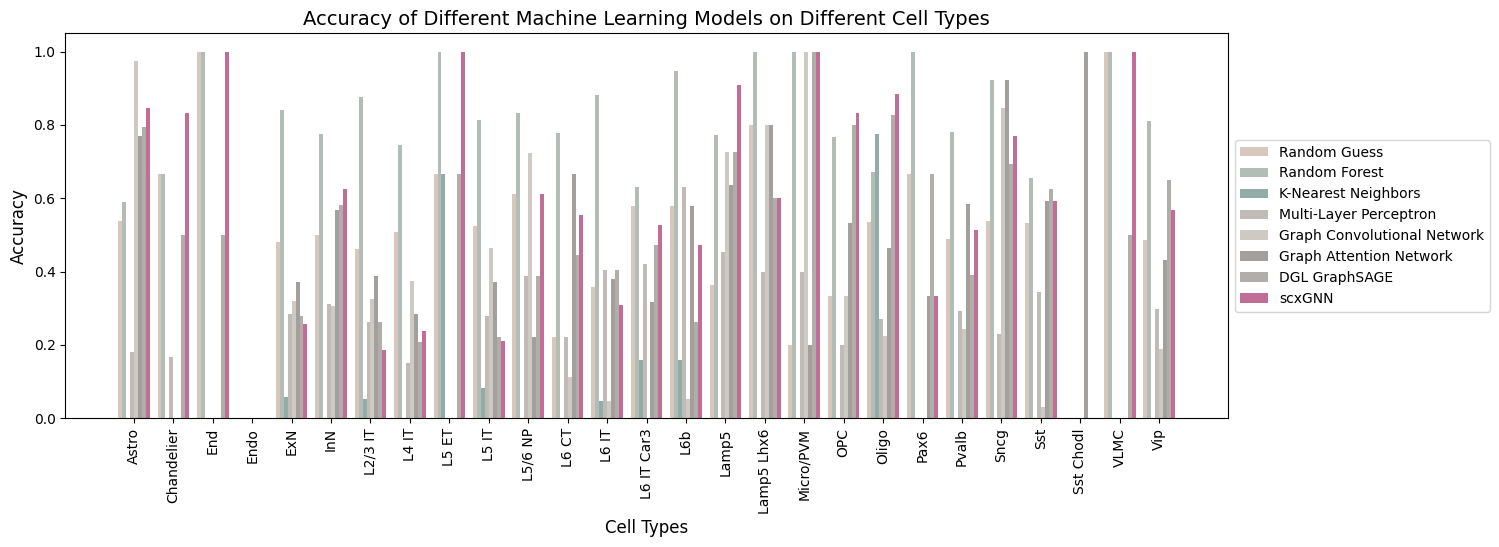

----------------------------------------------------------------
CON_ROS16


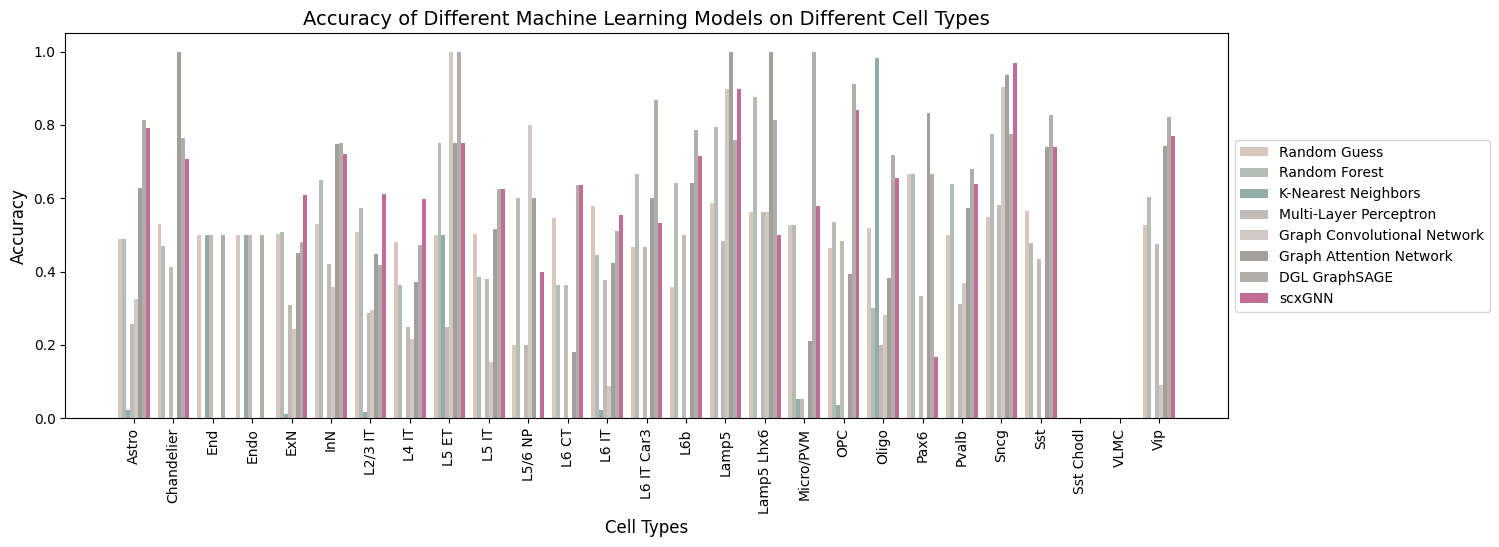

----------------------------------------------------------------
CON_ROS18


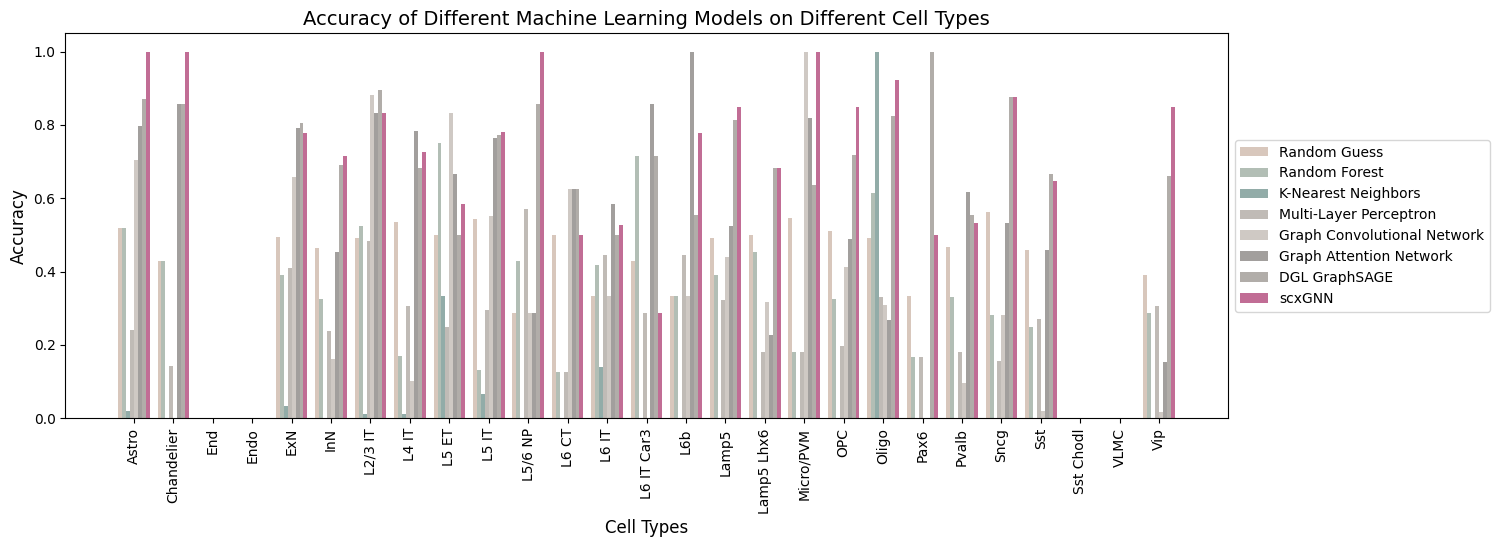

----------------------------------------------------------------
CON_ROS1


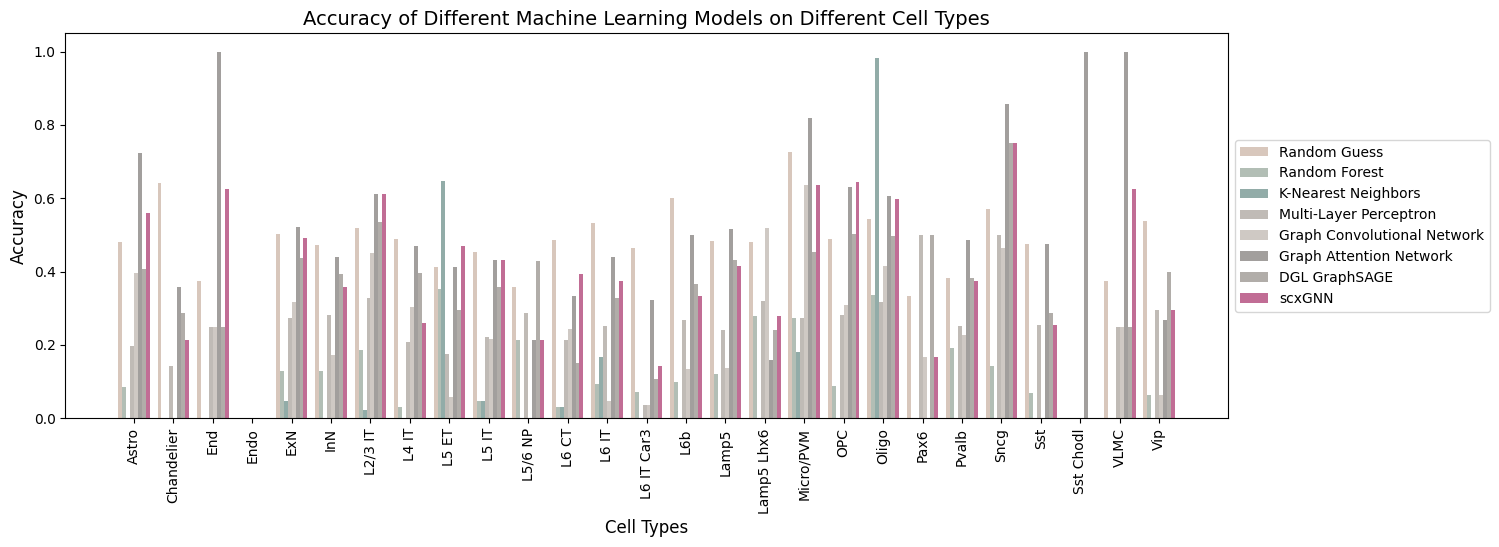

----------------------------------------------------------------
CON_ROS2


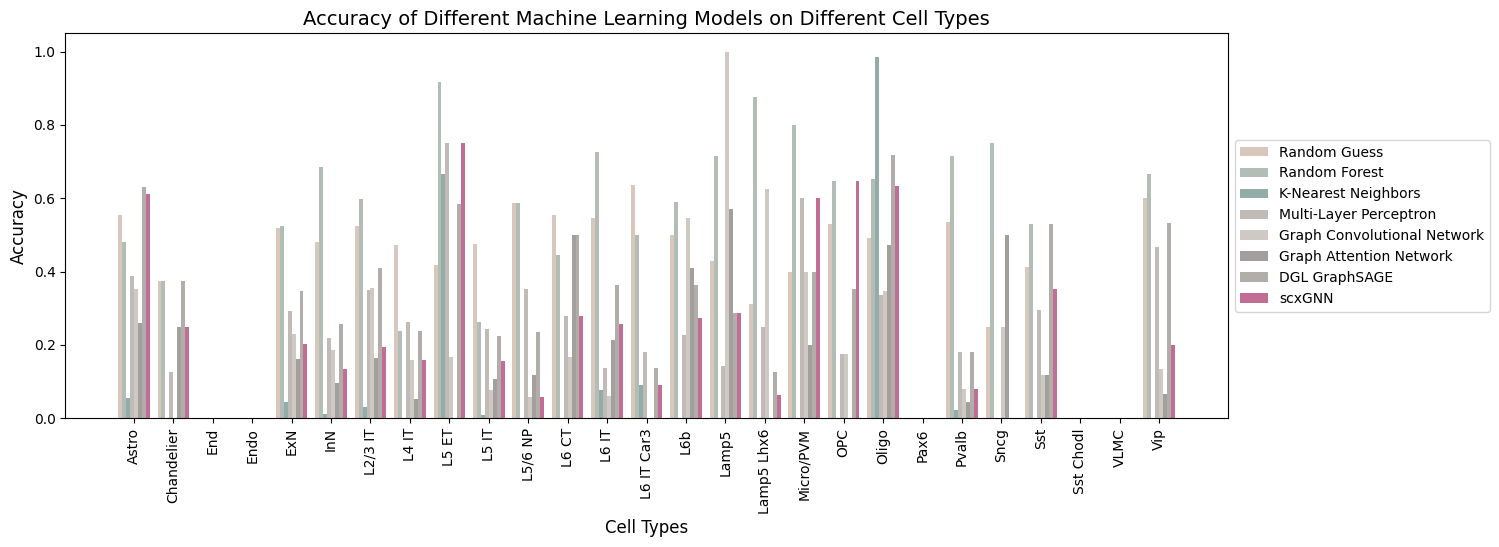

----------------------------------------------------------------
CON_ROS3


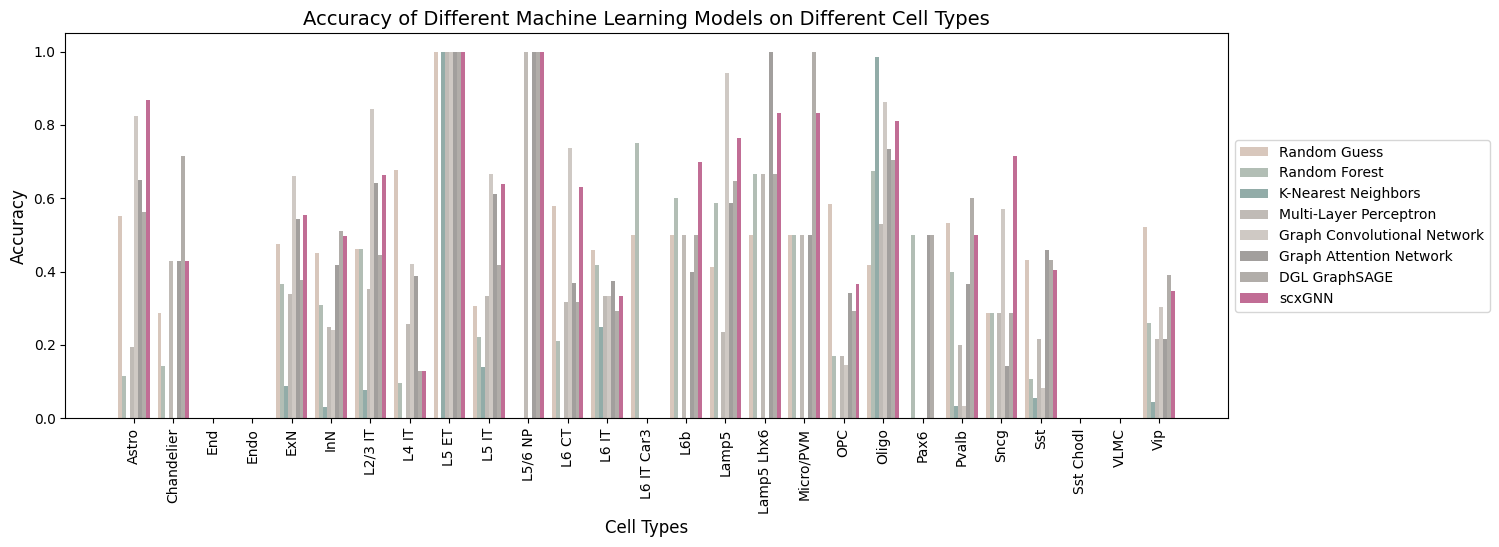

----------------------------------------------------------------
CON_ROS37


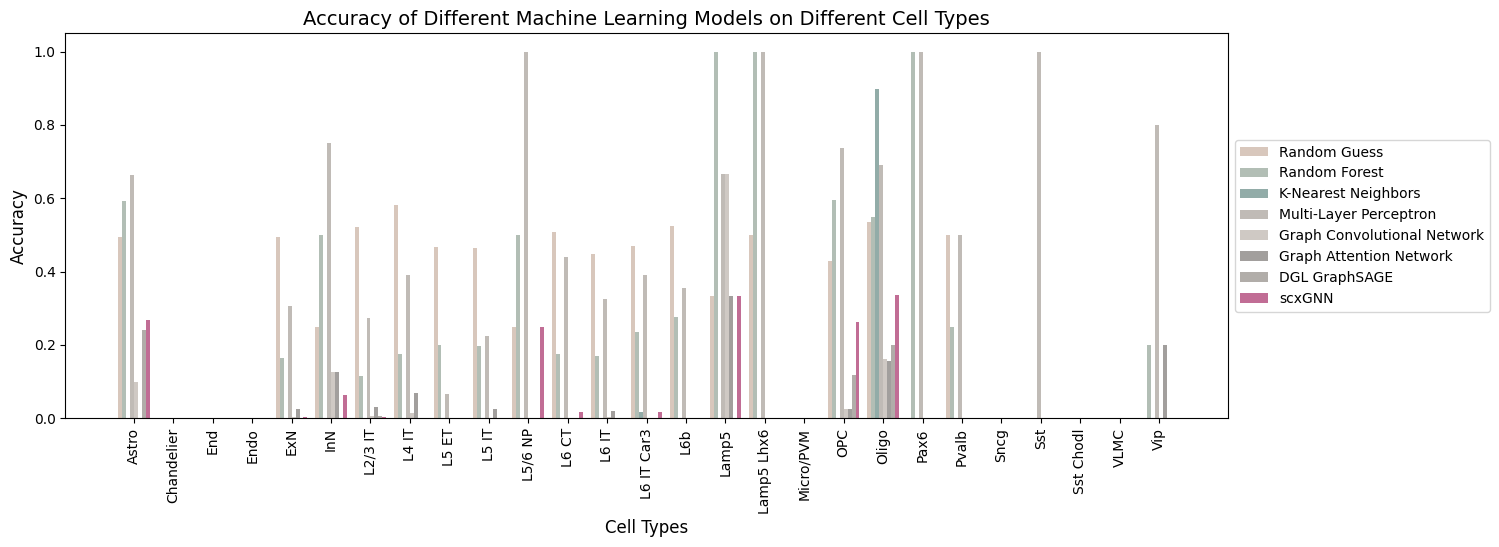

----------------------------------------------------------------
CON_ROS19


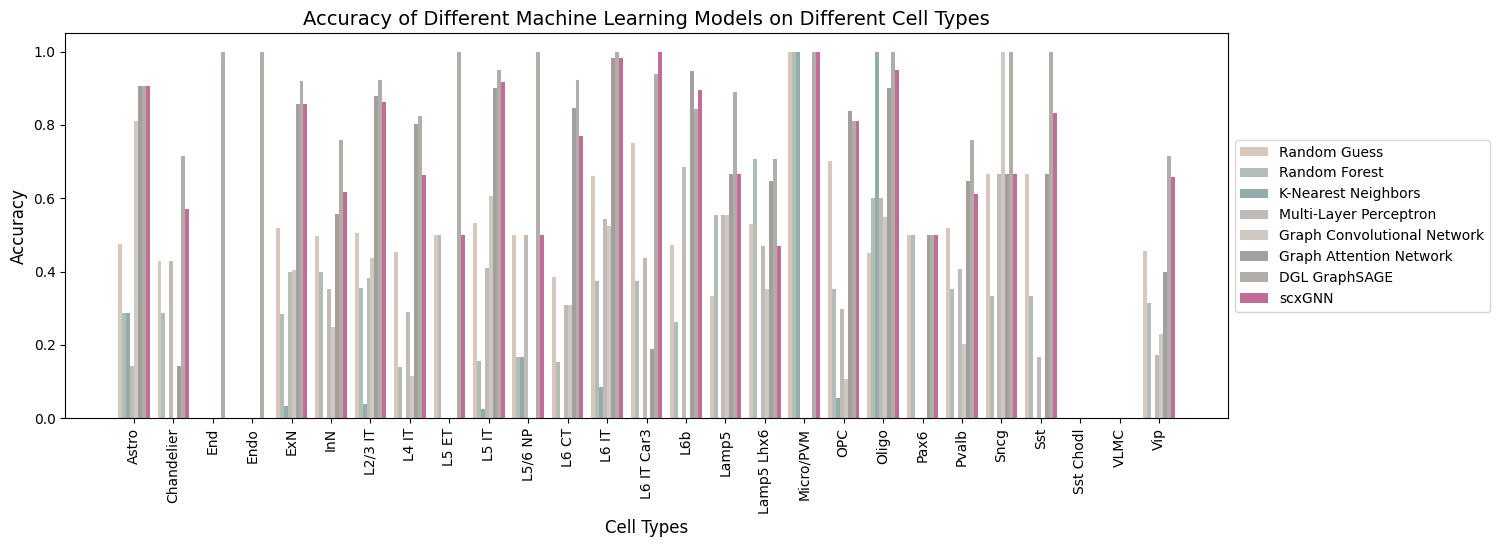

----------------------------------------------------------------
CON_ROS5


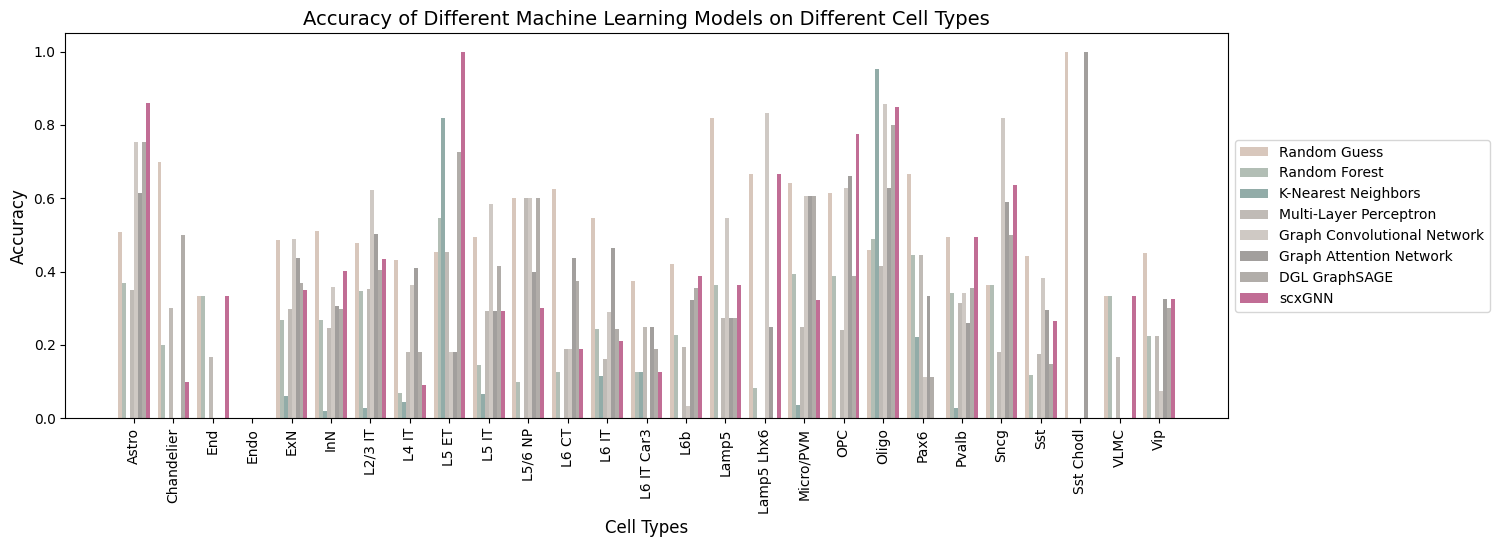

----------------------------------------------------------------
CON_ROS15


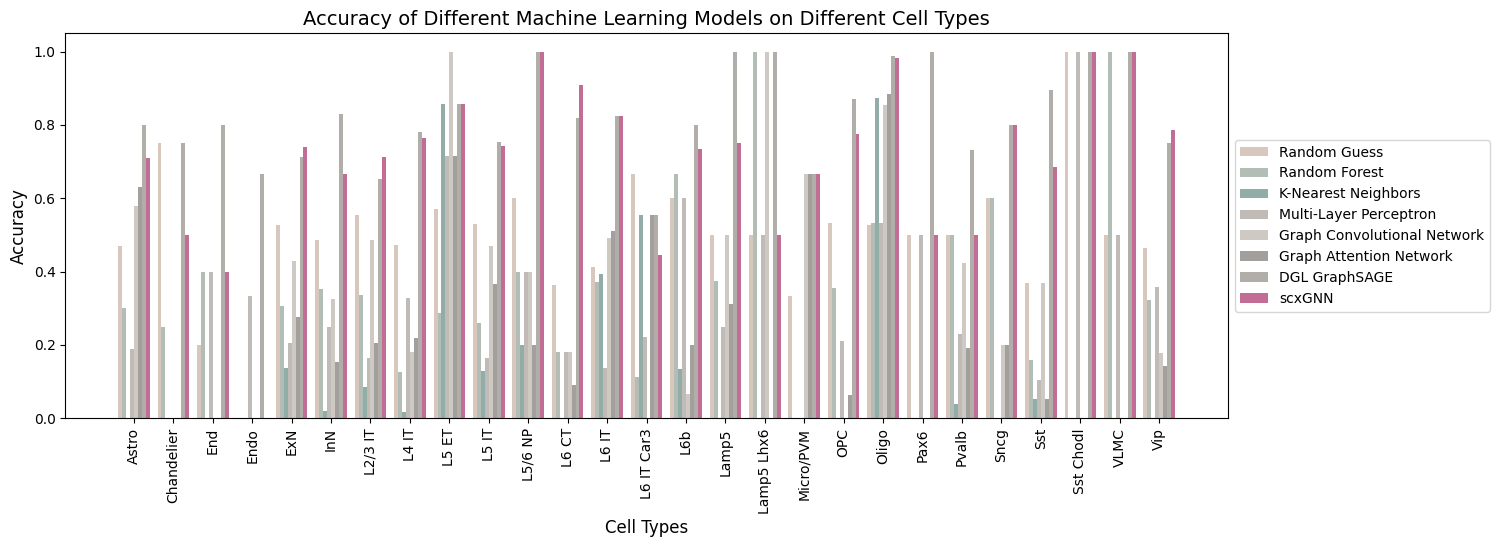

----------------------------------------------------------------
CON_ROS14


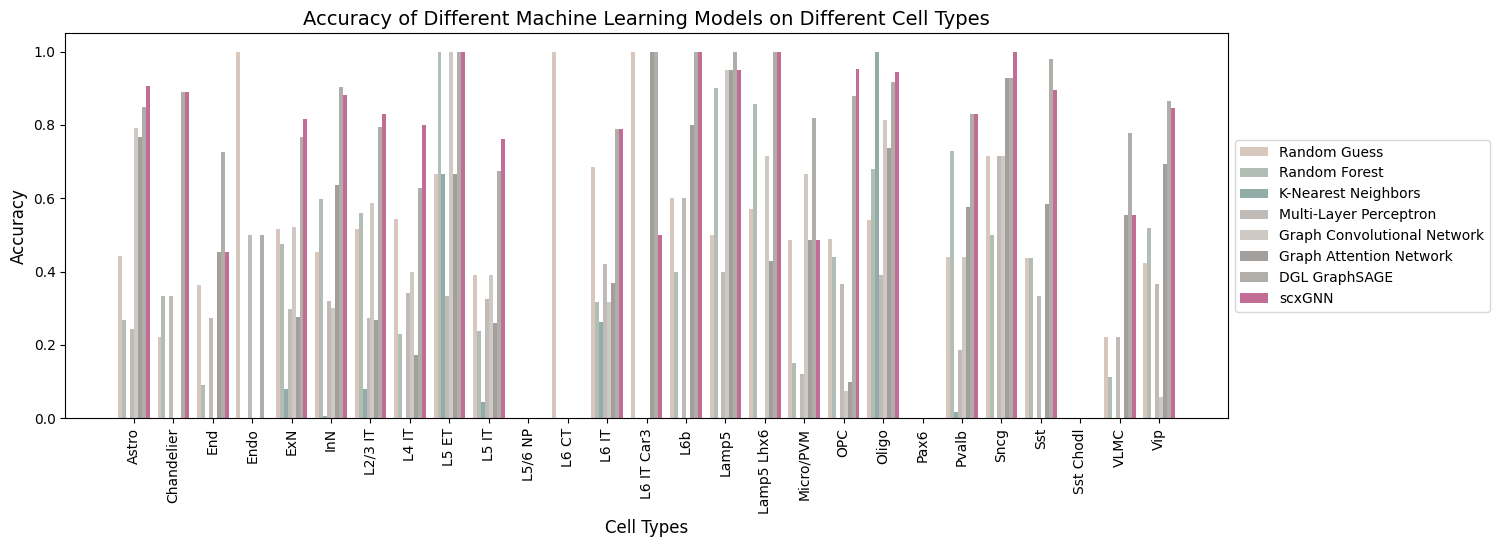

----------------------------------------------------------------
CON_ROS43


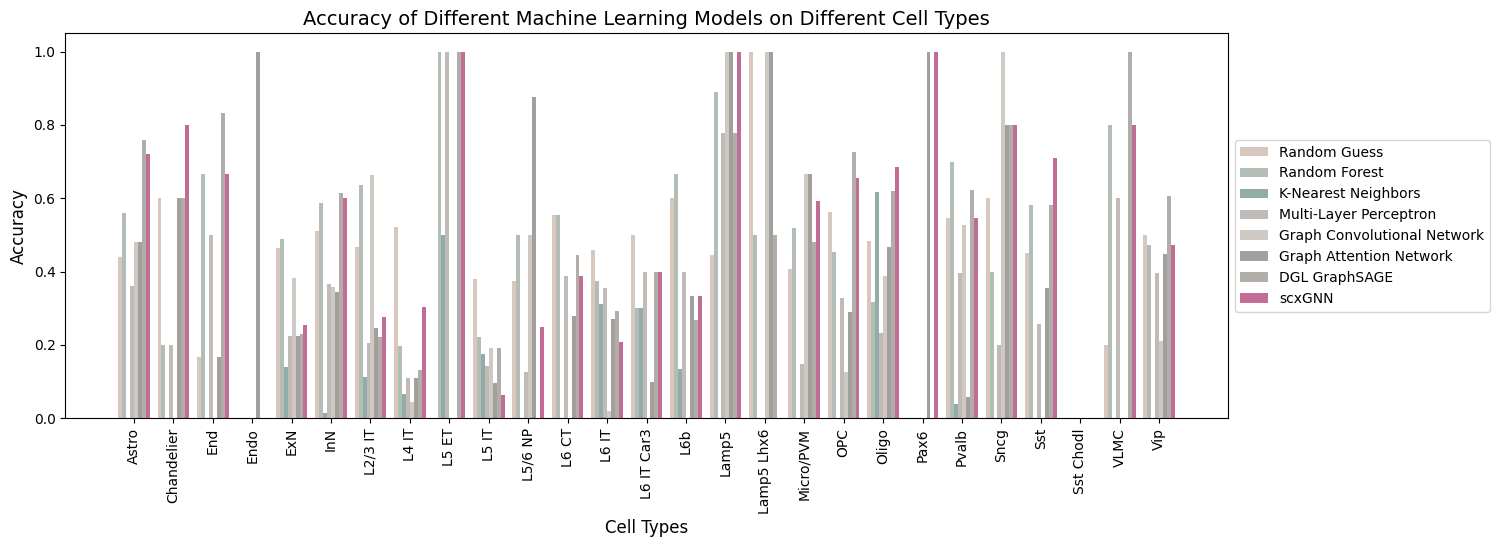

----------------------------------------------------------------
AD_ROS39


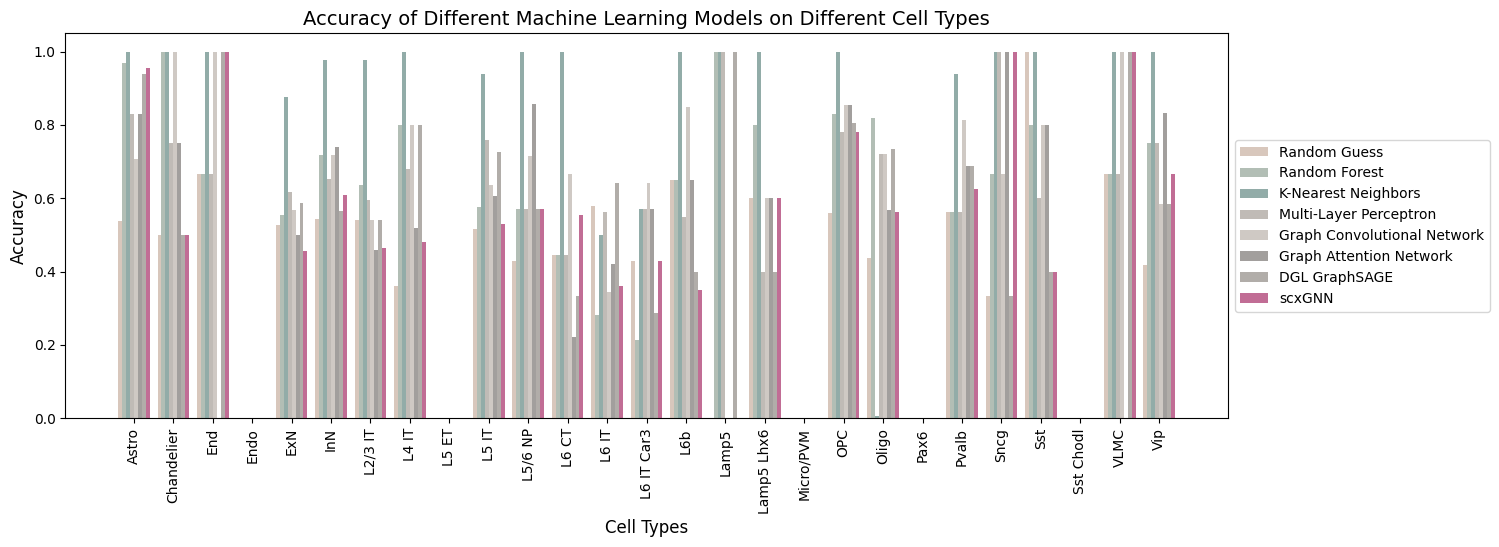

----------------------------------------------------------------
AD_ROS35


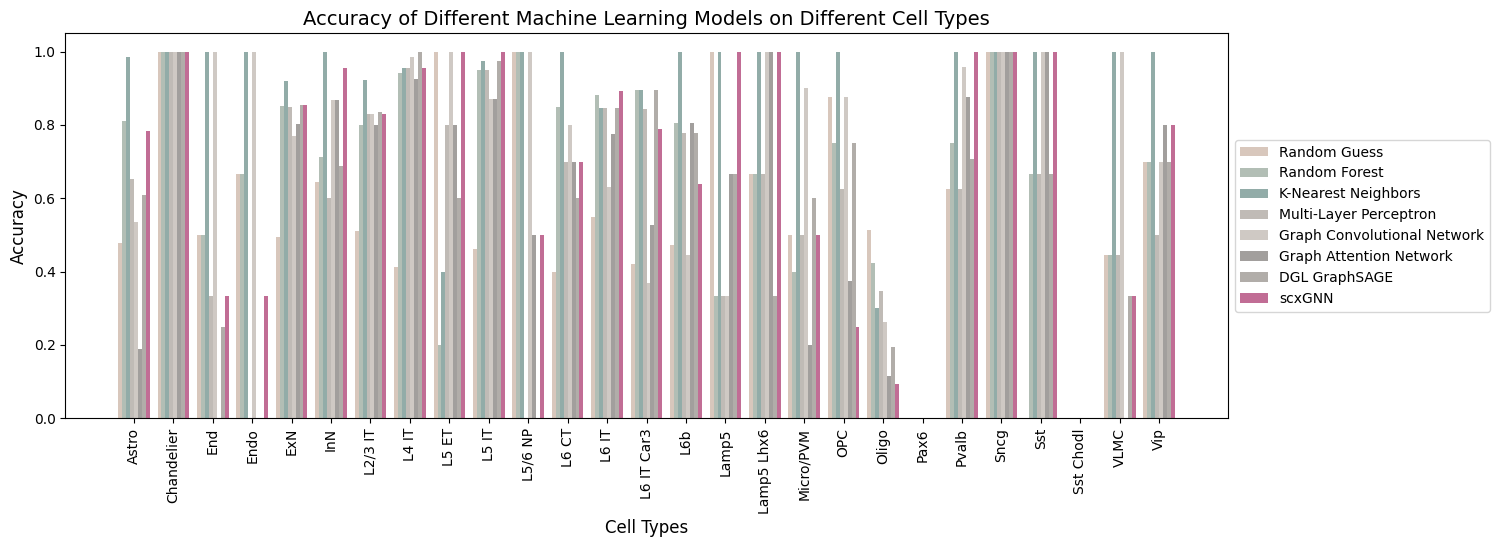

----------------------------------------------------------------
AD_ROS4


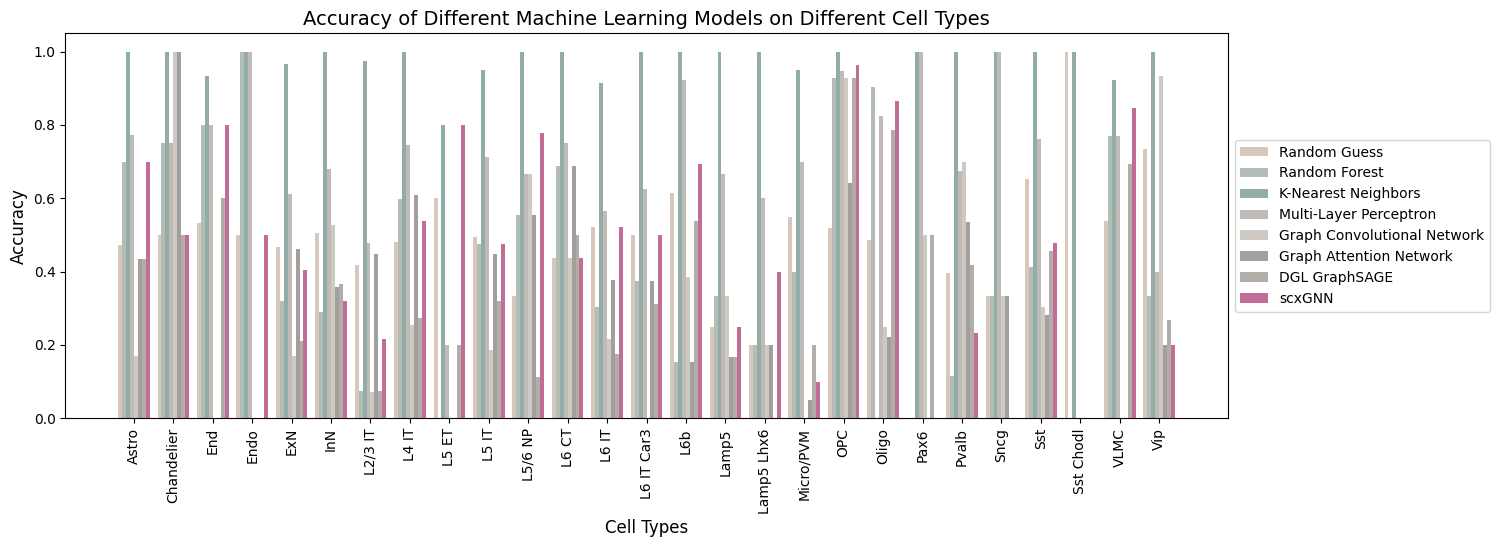

----------------------------------------------------------------
AD_ROS38


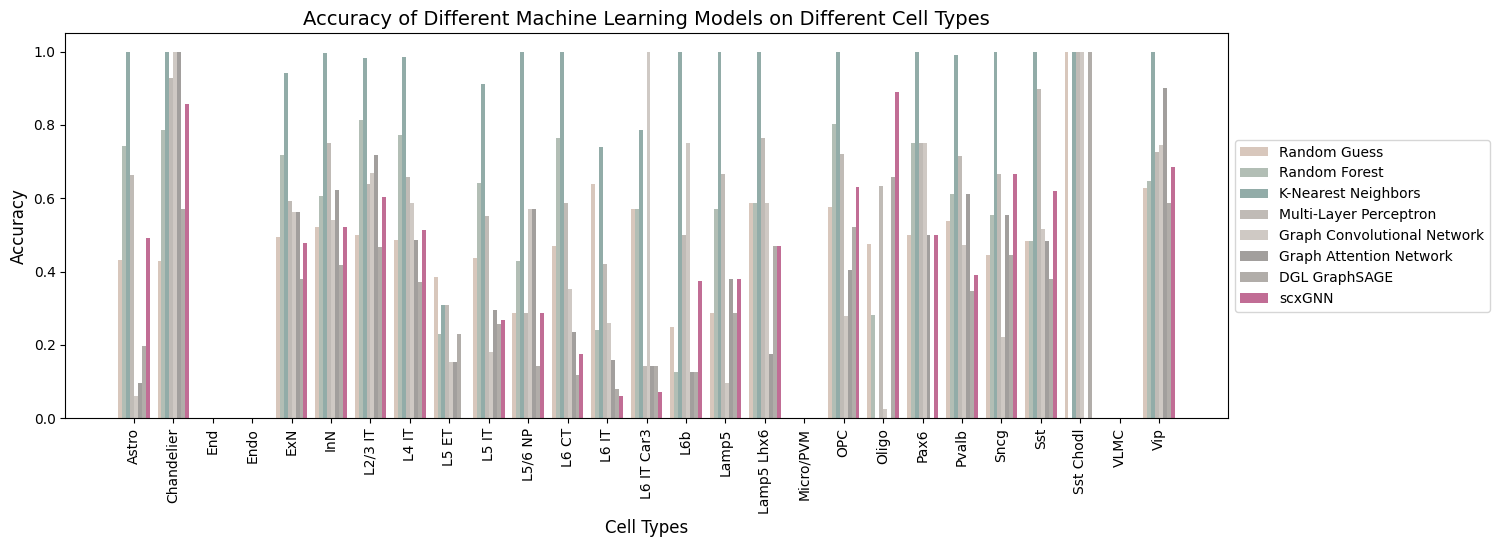

----------------------------------------------------------------
AD_ROS8


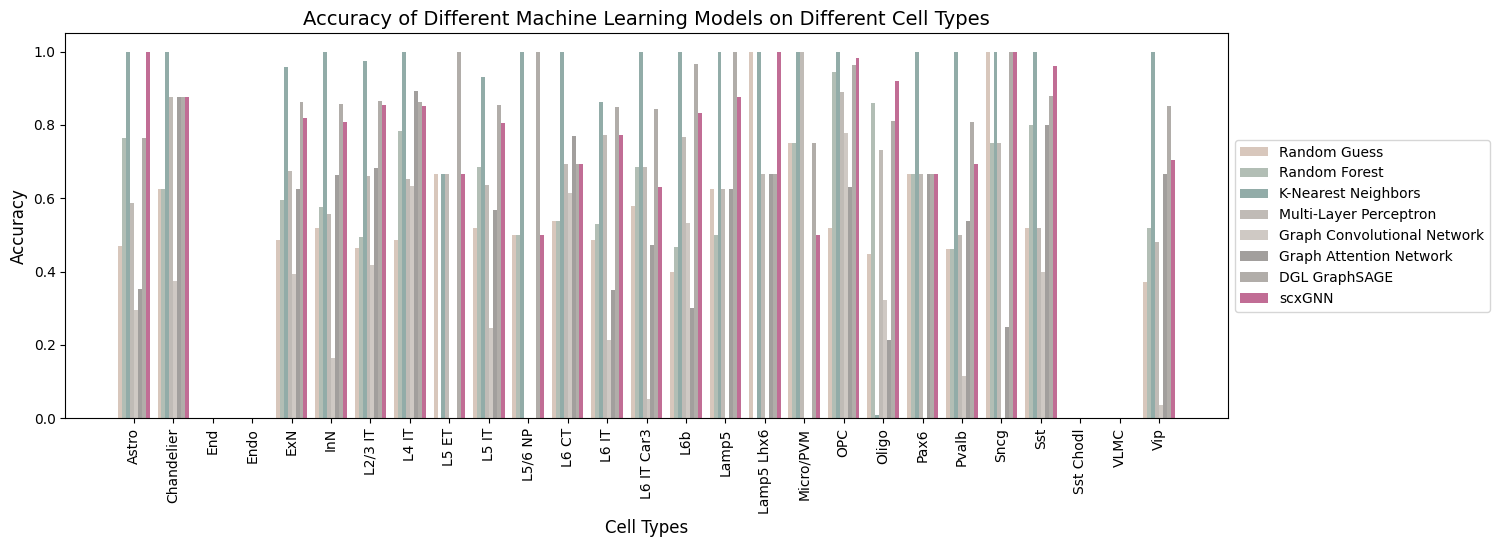

----------------------------------------------------------------
AD_ROS32


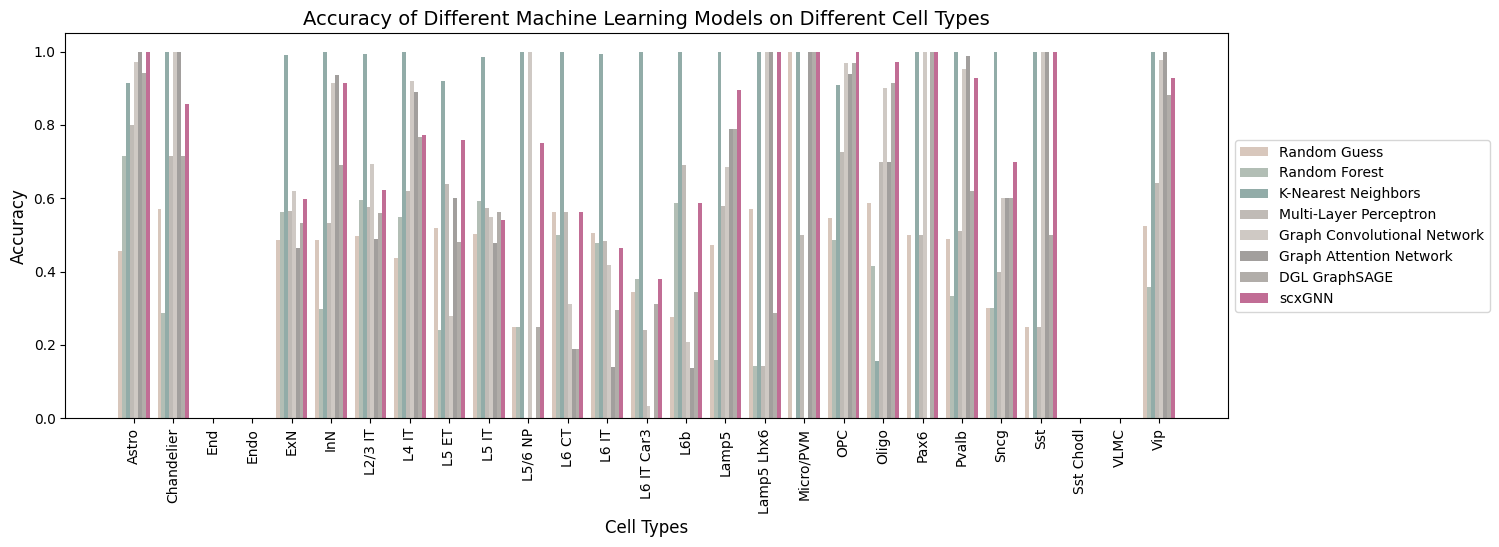

----------------------------------------------------------------
AD_ROS6


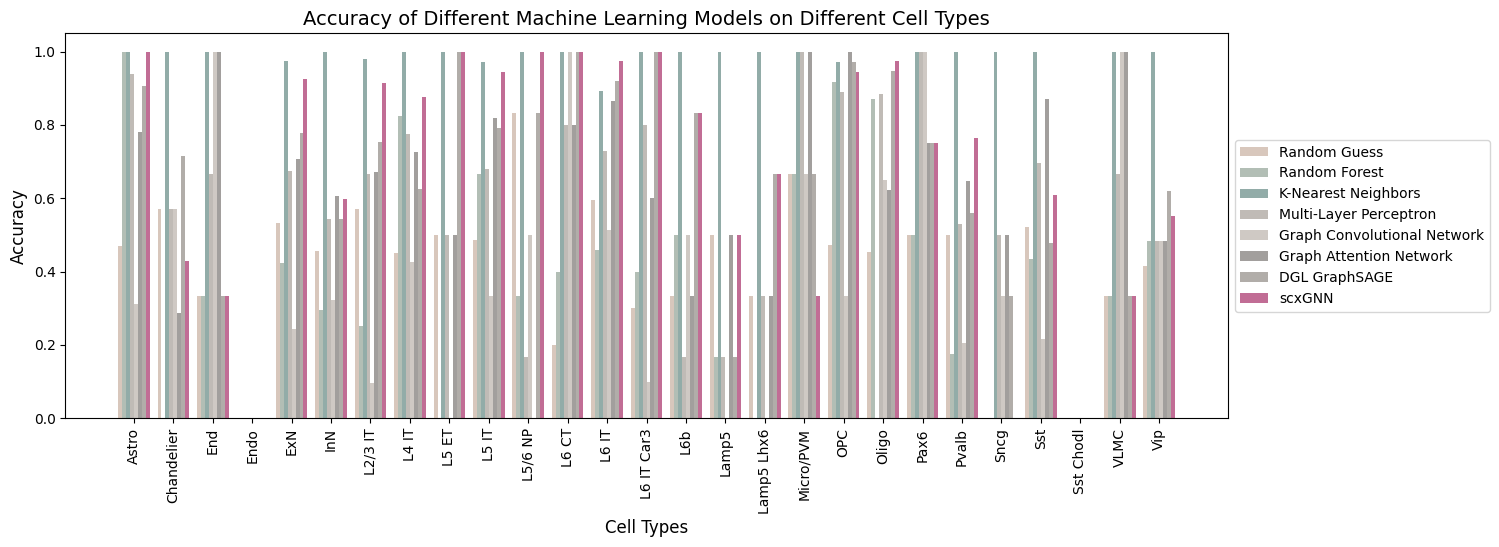

----------------------------------------------------------------
AD_ROS36


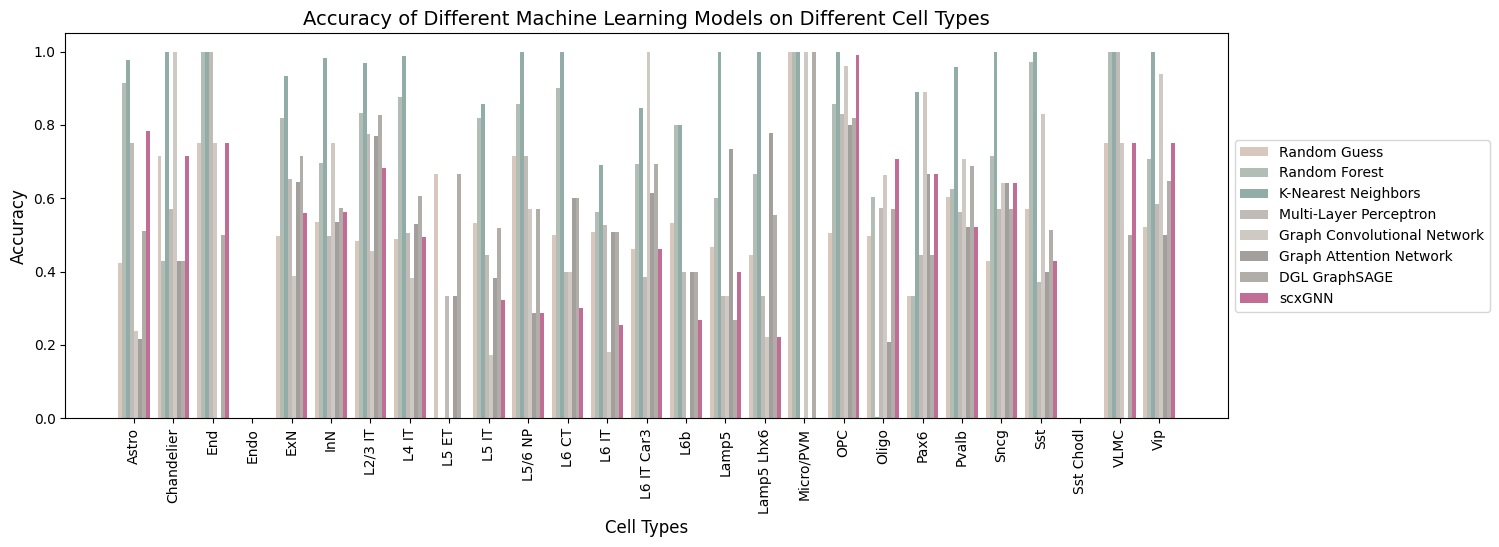

----------------------------------------------------------------
AD_ROS28


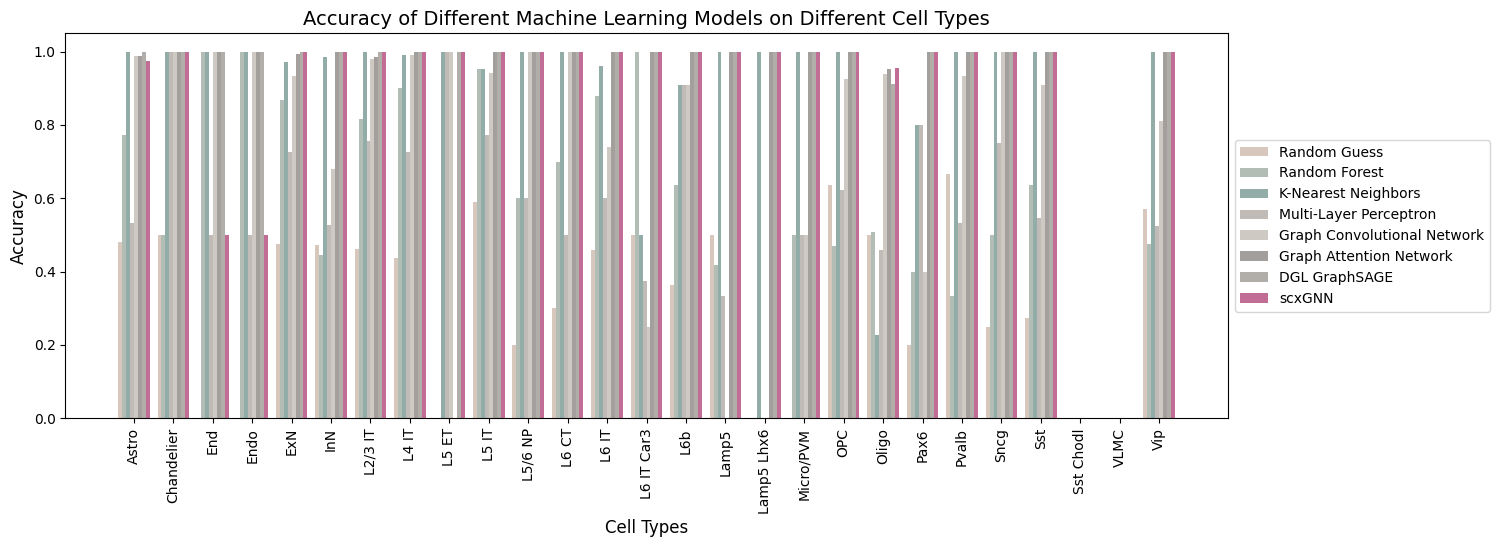

----------------------------------------------------------------
AD_ROS42


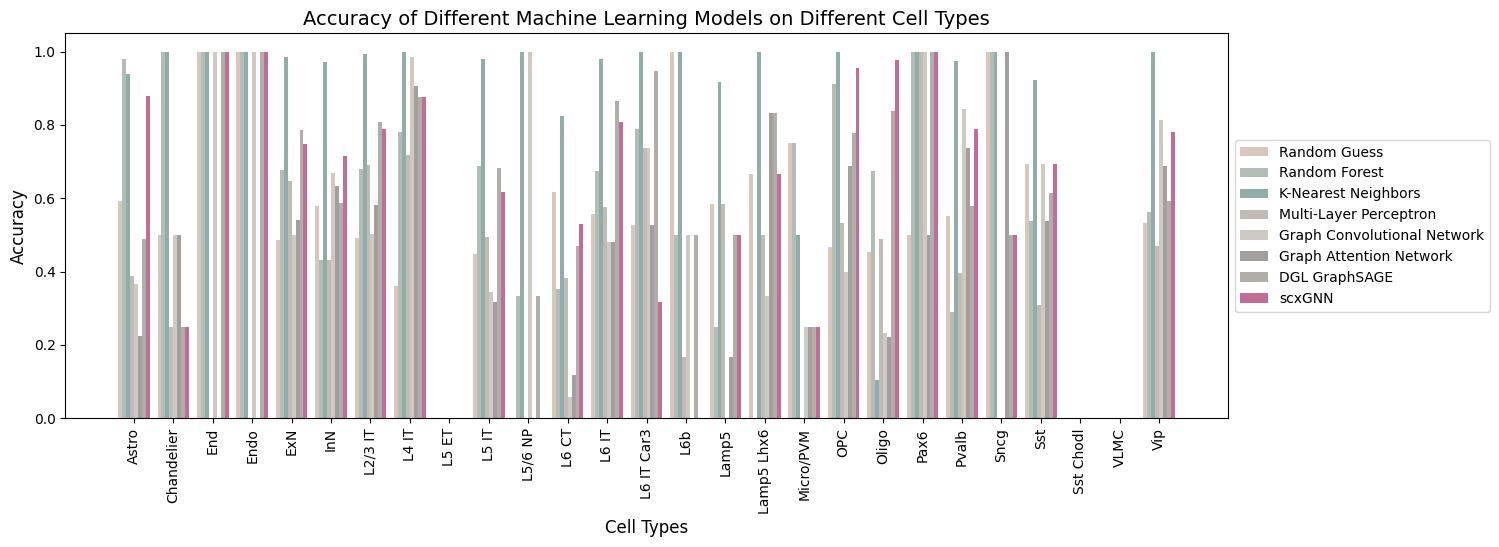

----------------------------------------------------------------
AD_ROS41


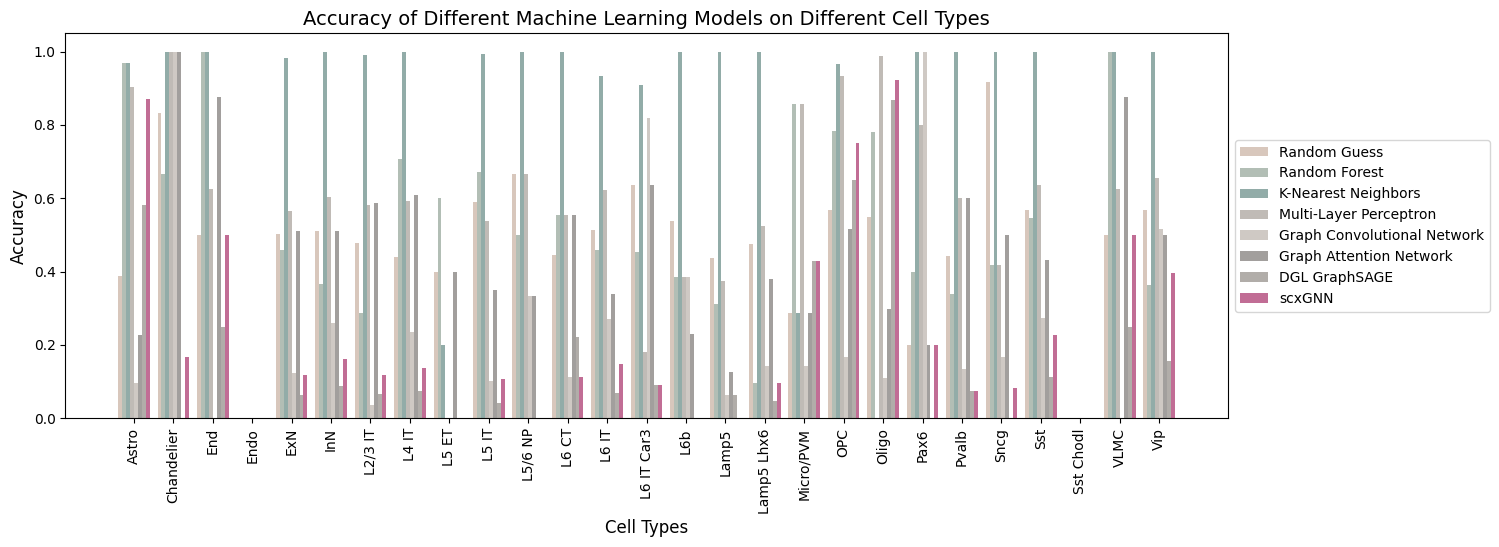

----------------------------------------------------------------
AD_ROS21


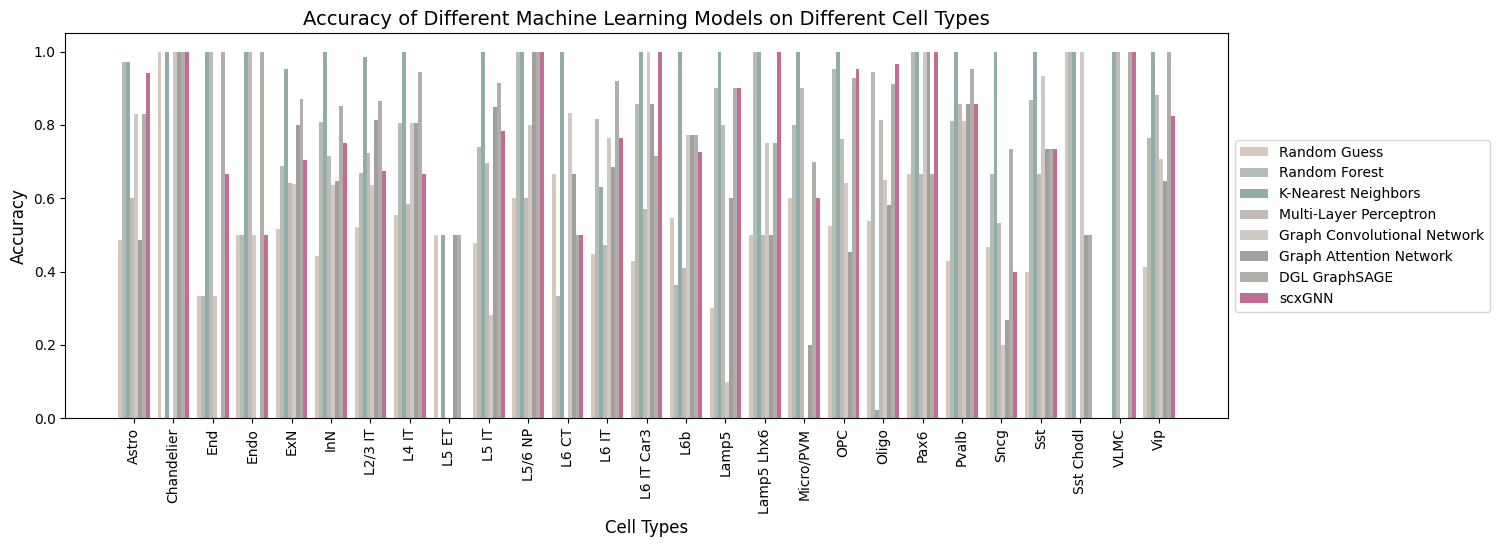

----------------------------------------------------------------
AD_ROS25


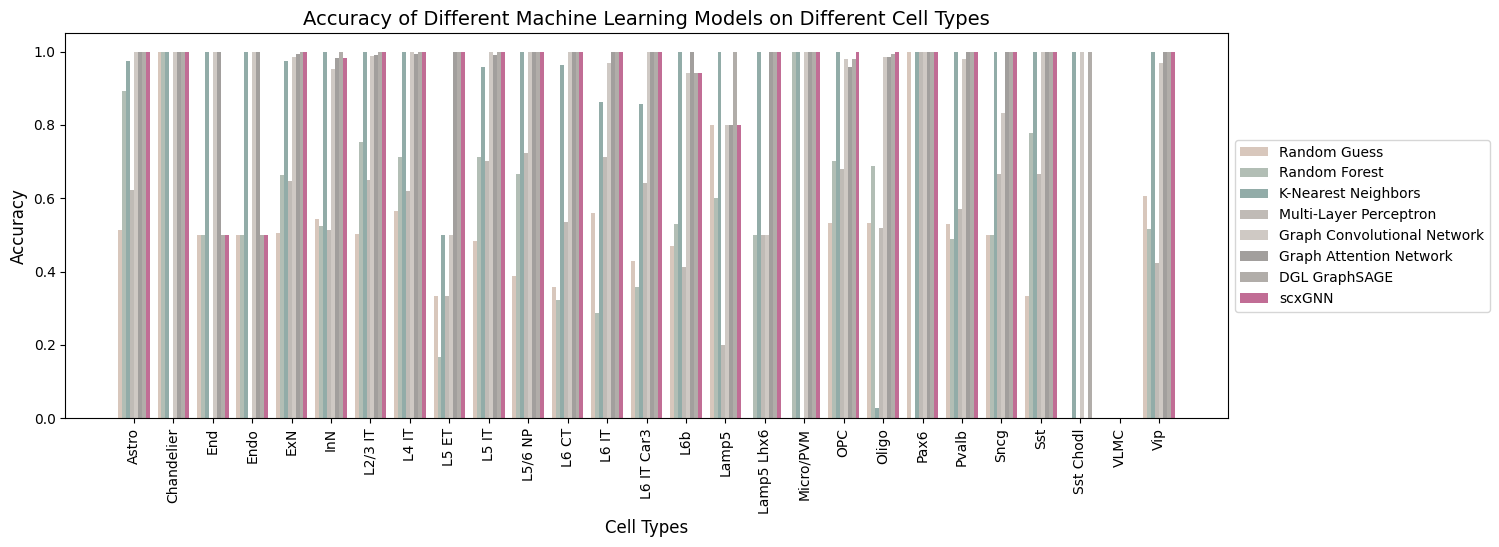

----------------------------------------------------------------
AD_ROS26


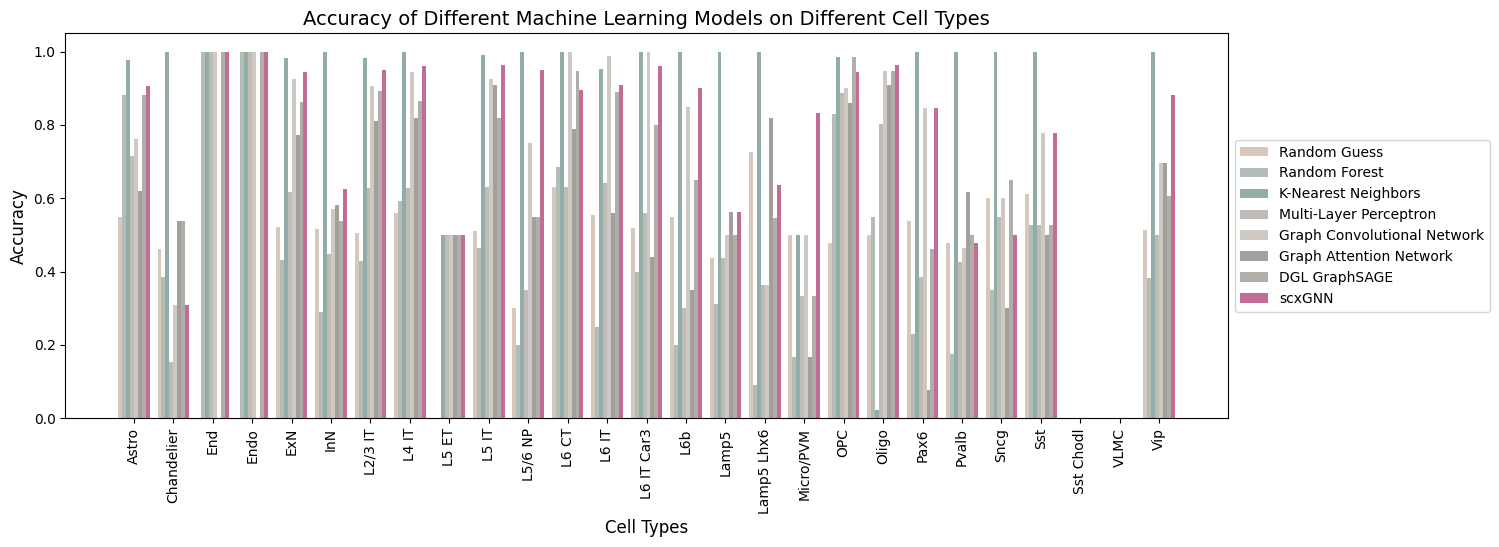

----------------------------------------------------------------
AD_ROS27


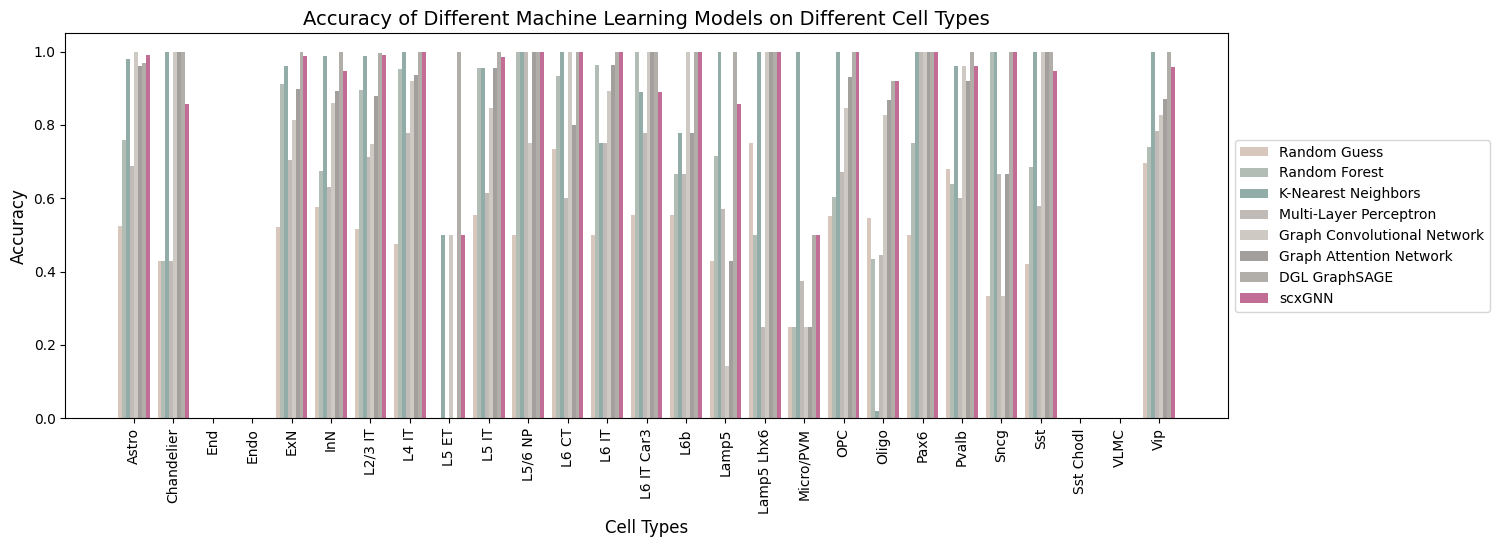

----------------------------------------------------------------
AD_ROS47


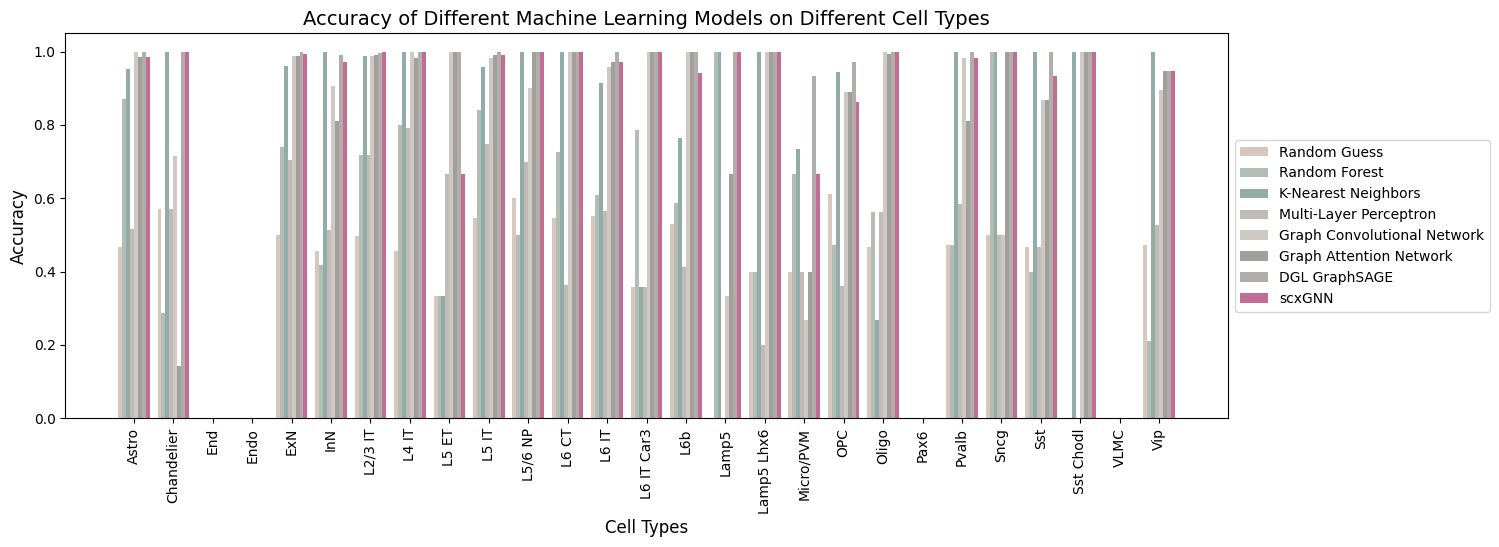

----------------------------------------------------------------
AD_ROS34


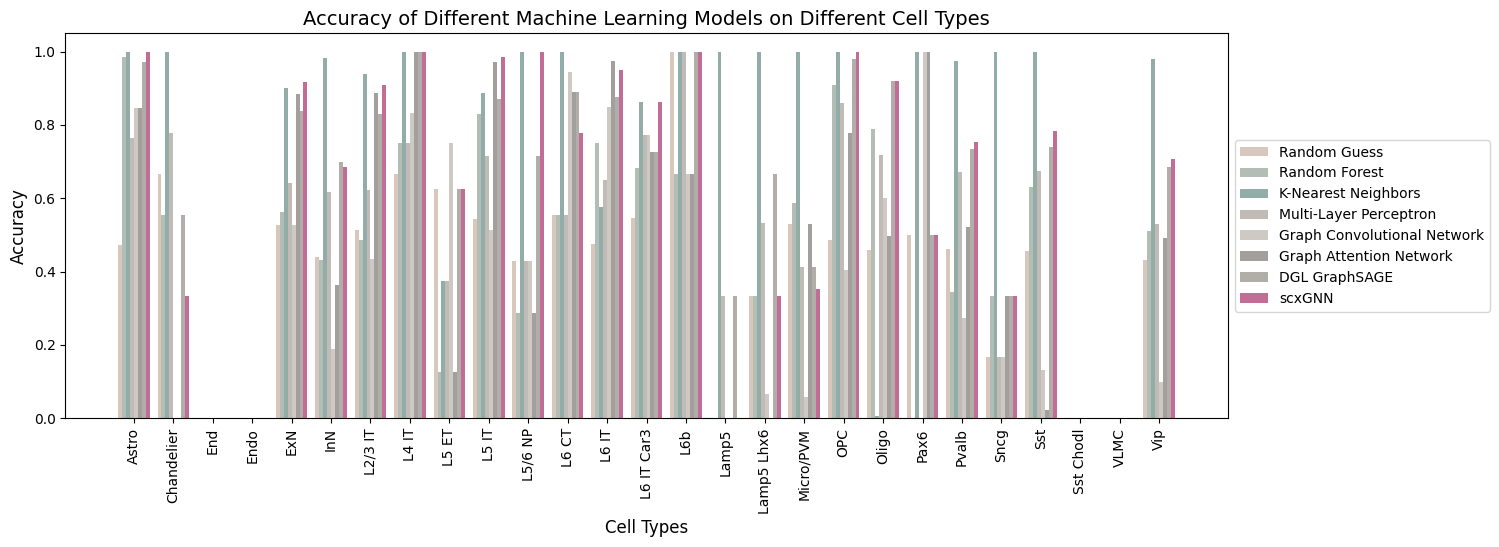

----------------------------------------------------------------
AD_ROS33


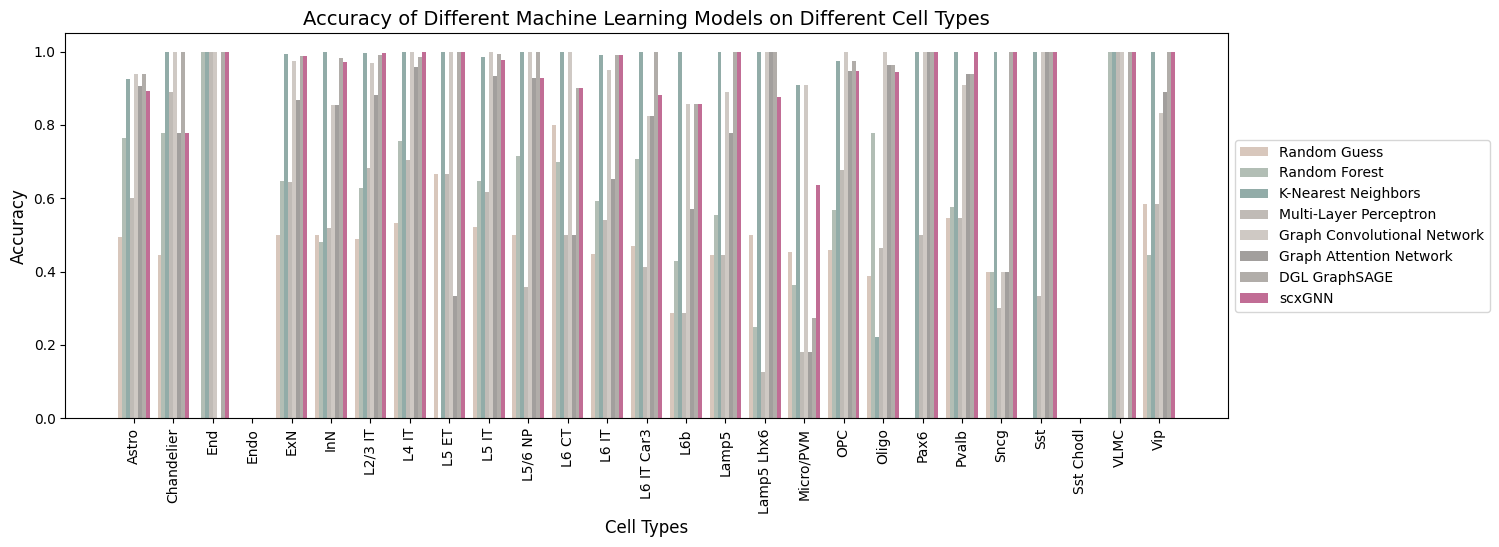

----------------------------------------------------------------
AD_ROS46


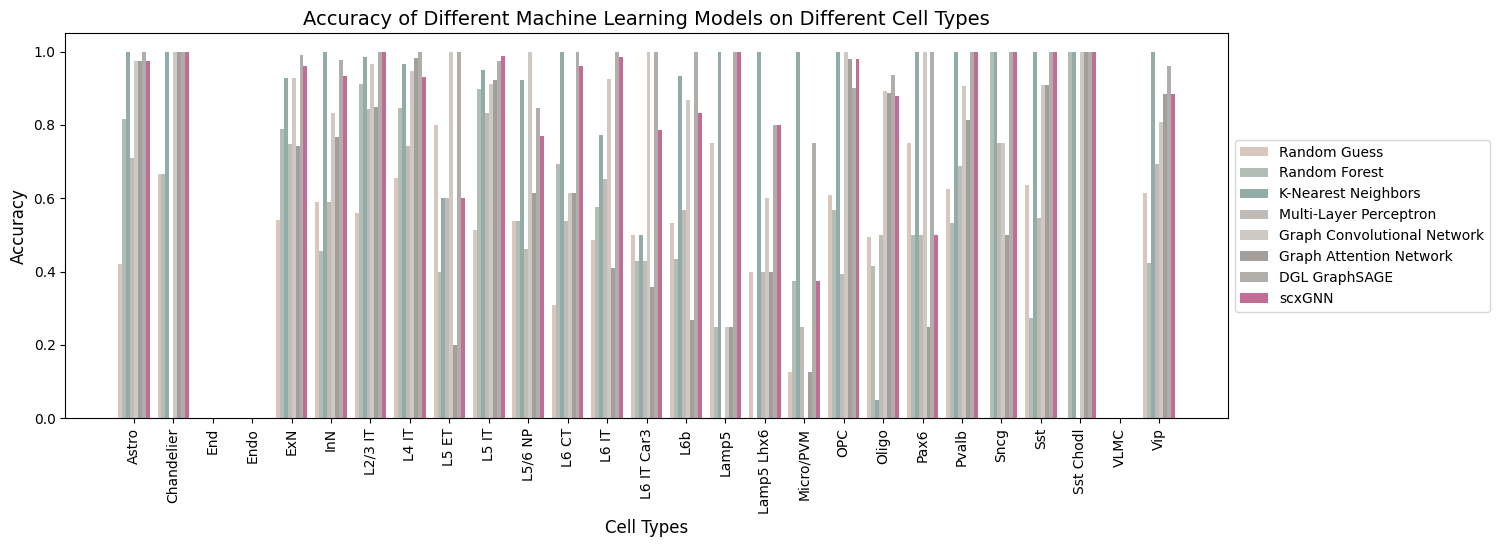

In [6]:
i=0
for p in os.listdir(inductive_data_path):
    if "CON" not in p and "AD" not in p:
        continue
    
    print("----------------------------------------------------------------")
    print(p)
    
    random_acc_per_cell_type = acc_per_cell_type(random_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    RF_acc_per_cell_type = acc_per_cell_type(RF_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    KNN_acc_per_cell_type = acc_per_cell_type(KNN_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    MLP_acc_per_cell_type = acc_per_cell_type(MLP_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    GCN_acc_per_cell_type = acc_per_cell_type(GCN_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    GAT_acc_per_cell_type = acc_per_cell_type(GAT_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    DGL_GraphSAGE_acc_per_cell_type = acc_per_cell_type(DGL_GraphSAGE_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    scxGNNv1_acc_per_cell_type = acc_per_cell_type(scxGNNv1_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    scxGNN_acc_per_cell_type = acc_per_cell_type(scxGNN_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    
    i+=1

    # Define the y-axis values as a list of accuracy scores for each cell type
    random_acc_scores = []
    RF_acc_scores = []
    KNN_acc_scores = []
    MLP_acc_scores = []
    GCN_acc_scores = []
    GAT_acc_scores = []
    DGL_GraphSAGE_acc_scores = []
    scxGNNv1_acc_scores = []
    scxGNN_acc_scores = []
    
    for cell_type in all_cell_types:
        random_acc_scores.append(random_acc_per_cell_type[cell_type])
        RF_acc_scores.append(RF_acc_per_cell_type[cell_type])
        KNN_acc_scores.append(KNN_acc_per_cell_type[cell_type])
        MLP_acc_scores.append(MLP_acc_per_cell_type[cell_type])
        GCN_acc_scores.append(GCN_acc_per_cell_type[cell_type])
        GAT_acc_scores.append(GAT_acc_per_cell_type[cell_type])
        DGL_GraphSAGE_acc_scores.append(DGL_GraphSAGE_acc_per_cell_type[cell_type])
        scxGNNv1_acc_scores.append(scxGNNv1_acc_per_cell_type[cell_type])
        scxGNN_acc_scores.append(scxGNN_acc_per_cell_type[cell_type])

    # Define the width of the bars
    bar_width = 0.1

    # Define the positions of the bars on the x-axis
    r1 = list(range(len(all_cell_types)))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]
    r5 = [x + bar_width for x in r4]
    r6 = [x + bar_width for x in r5]
    r7 = [x + bar_width for x in r6]
    r8 = [x + bar_width for x in r7]
    r9 = [x + bar_width for x in r8]

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(15, 5))

    # Plot the bars
    ax.bar(r1, random_acc_scores, color=method_colors[0], width=bar_width, label='Random Guess')
    ax.bar(r2, RF_acc_scores, color=method_colors[1], width=bar_width, label='Random Forest')
    ax.bar(r3, KNN_acc_scores, color=method_colors[2], width=bar_width, label='K-Nearest Neighbors')
    ax.bar(r4, MLP_acc_scores, color=method_colors[3], width=bar_width, label='Multi-Layer Perceptron')
    ax.bar(r5, GCN_acc_scores, color=method_colors[4], width=bar_width, label='Graph Convolutional Network')
    ax.bar(r6, GAT_acc_scores, color=method_colors[5], width=bar_width, label='Graph Attention Network')
    ax.bar(r7, DGL_GraphSAGE_acc_scores, color=method_colors[6], width=bar_width, label='DGL GraphSAGE')
#     ax.bar(r8, scxGNNv1_acc_scores, color=method_colors[0], width=bar_width, label='scxGNNv1')
    ax.bar(r8, scxGNN_acc_scores, color=method_colors[7], width=bar_width, label='scxGNN')

    # Add x-axis and y-axis labels
    ax.set_xlabel('Cell Types', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)

    # Add a title for the plot
    ax.set_title('Accuracy of Different Machine Learning Models on Different Cell Types', fontsize=14)

    # Add legend
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90)

    # Set the x-axis tick labels to be the cell type names
    plt.xticks([r + bar_width*3.5 for r in range(len(all_cell_types))], all_cell_types)

    # Display the plot
    plt.show()

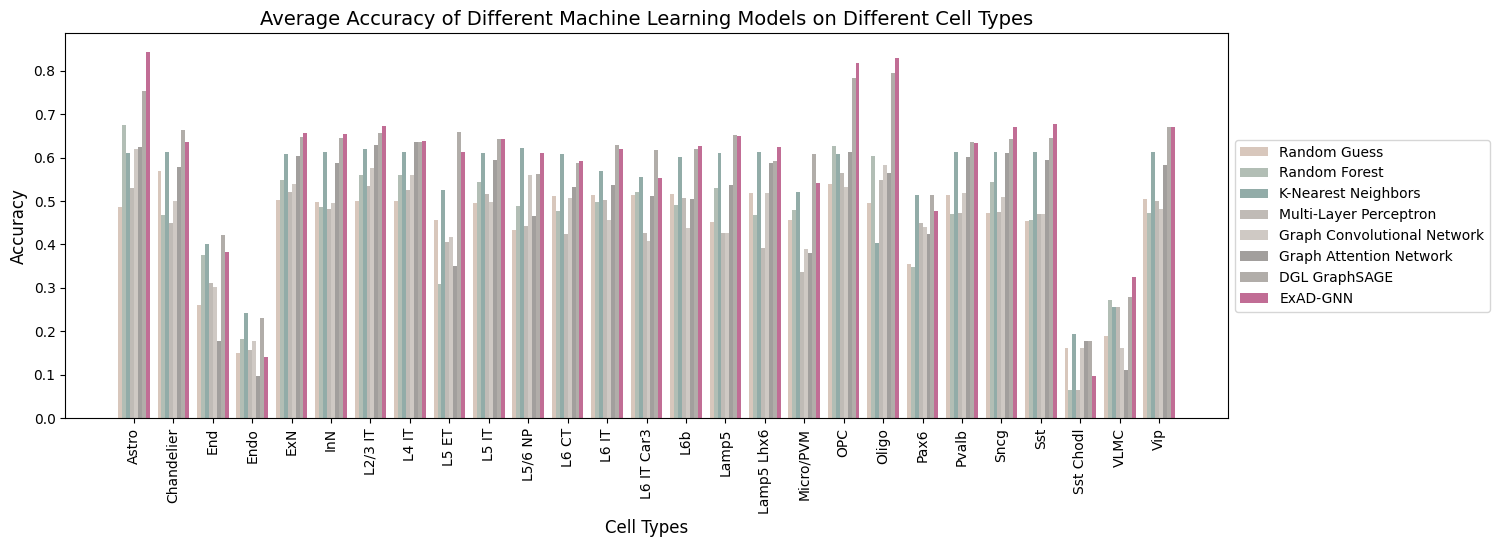

In [7]:
# Compute the average/std accuracy scores across all data splits
random_acc_per_cell_type_avg_std = {}
RF_acc_per_cell_type_avg_std = {}
KNN_acc_per_cell_type_avg_std = {}
MLP_acc_per_cell_type_avg_std = {}
GCN_acc_per_cell_type_avg_std = {}
GAT_acc_per_cell_type_avg_std = {}
DGL_GraphSAGE_acc_per_cell_type_avg_std = {}
scxGNNv1_acc_per_cell_type_avg_std = {}
scxGNN_acc_per_cell_type_avg_std = {}

avg_std_list = [random_acc_per_cell_type_avg_std, RF_acc_per_cell_type_avg_std,KNN_acc_per_cell_type_avg_std,MLP_acc_per_cell_type_avg_std,GCN_acc_per_cell_type_avg_std,\
               GAT_acc_per_cell_type_avg_std,DGL_GraphSAGE_acc_per_cell_type_avg_std,scxGNNv1_acc_per_cell_type_avg_std,scxGNN_acc_per_cell_type_avg_std]

for l in avg_std_list:
    for c in all_cell_types:
        l[c] = []

i = 0
for p in os.listdir(inductive_data_path):
    if "CON" not in p and "AD" not in p:
        continue
    random_acc_per_cell_type = acc_per_cell_type(random_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    RF_acc_per_cell_type = acc_per_cell_type(RF_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    KNN_acc_per_cell_type = acc_per_cell_type(KNN_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    MLP_acc_per_cell_type = acc_per_cell_type(MLP_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    GCN_acc_per_cell_type = acc_per_cell_type(GCN_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    GAT_acc_per_cell_type = acc_per_cell_type(GAT_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    DGL_GraphSAGE_acc_per_cell_type = acc_per_cell_type(DGL_GraphSAGE_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    scxGNNv1_acc_per_cell_type = acc_per_cell_type(scxGNNv1_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
    scxGNN_acc_per_cell_type = acc_per_cell_type(scxGNN_total_pred_list[i], total_label_list[i], cell_types_total_list[i])
   
    for cell_type in all_cell_types:
        random_acc_per_cell_type_avg_std[cell_type].append(random_acc_per_cell_type[cell_type])
        RF_acc_per_cell_type_avg_std[cell_type].append(RF_acc_per_cell_type[cell_type])
        KNN_acc_per_cell_type_avg_std[cell_type].append(KNN_acc_per_cell_type[cell_type])
        MLP_acc_per_cell_type_avg_std[cell_type].append(MLP_acc_per_cell_type[cell_type])
        GCN_acc_per_cell_type_avg_std[cell_type].append(GCN_acc_per_cell_type[cell_type])
        GAT_acc_per_cell_type_avg_std[cell_type].append(GAT_acc_per_cell_type[cell_type])
        DGL_GraphSAGE_acc_per_cell_type_avg_std[cell_type].append(DGL_GraphSAGE_acc_per_cell_type[cell_type])
        scxGNNv1_acc_per_cell_type_avg_std[cell_type].append(scxGNNv1_acc_per_cell_type[cell_type])
        scxGNN_acc_per_cell_type_avg_std[cell_type].append(scxGNN_acc_per_cell_type[cell_type])
        
    i+=1

random_acc_scores_avg = []
RF_acc_scores_avg = []
KNN_acc_scores_avg = []
MLP_acc_scores_avg = []
GCN_acc_scores_avg = []
GAT_acc_scores_avg = []
DGL_GraphSAGE_acc_scores_avg = []
scxGNNv1_acc_scores_avg = []
scxGNN_acc_scores_avg = []

random_acc_scores_std = []
RF_acc_scores_std = []
KNN_acc_scores_std = []
MLP_acc_scores_std = []
GCN_acc_scores_std = []
GAT_acc_scores_std = []
DGL_GraphSAGE_acc_scores_std = []
scxGNNv1_acc_scores_std = []
scxGNN_acc_scores_std = []

# Define the y-axis values as a list of accuracy scores for each cell type
for c in all_cell_types:
    random_acc_scores_avg.append(np.mean(random_acc_per_cell_type_avg_std[c]))
    RF_acc_scores_avg.append(np.mean(RF_acc_per_cell_type_avg_std[c]))
    KNN_acc_scores_avg.append(np.mean(KNN_acc_per_cell_type_avg_std[c]))
    MLP_acc_scores_avg.append(np.mean(MLP_acc_per_cell_type_avg_std[c]))
    GCN_acc_scores_avg.append(np.mean(GCN_acc_per_cell_type_avg_std[c]))
    GAT_acc_scores_avg.append(np.mean(GAT_acc_per_cell_type_avg_std[c]))
    DGL_GraphSAGE_acc_scores_avg.append(np.mean(DGL_GraphSAGE_acc_per_cell_type_avg_std[c]))
    scxGNNv1_acc_scores_avg.append(np.mean(scxGNNv1_acc_per_cell_type_avg_std[c]))
    scxGNN_acc_scores_avg.append(np.mean(scxGNN_acc_per_cell_type_avg_std[c]))
    
    random_acc_scores_std.append(np.std(random_acc_per_cell_type_avg_std[c]))
    RF_acc_scores_std.append(np.std(RF_acc_per_cell_type_avg_std[c]))
    KNN_acc_scores_std.append(np.std(KNN_acc_per_cell_type_avg_std[c]))
    MLP_acc_scores_std.append(np.std(MLP_acc_per_cell_type_avg_std[c]))
    GCN_acc_scores_std.append(np.std(GCN_acc_per_cell_type_avg_std[c]))
    GAT_acc_scores_std.append(np.std(GAT_acc_per_cell_type_avg_std[c]))
    DGL_GraphSAGE_acc_scores_std.append(np.std(DGL_GraphSAGE_acc_per_cell_type_avg_std[c]))
    scxGNNv1_acc_scores_std.append(np.std(scxGNNv1_acc_per_cell_type_avg_std[c]))
    scxGNN_acc_scores_std.append(np.std(scxGNN_acc_per_cell_type_avg_std[c]))

# Define the width of the bars
bar_width = 0.1

# Define the positions of the bars on the x-axis
r1 = list(range(len(all_cell_types)))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(r1, random_acc_scores_avg, color=method_colors[0], width=bar_width, label='Random Guess')
ax.bar(r2, RF_acc_scores_avg, color=method_colors[1], width=bar_width, label='Random Forest')
ax.bar(r3, KNN_acc_scores_avg, color=method_colors[2], width=bar_width, label='K-Nearest Neighbors')
ax.bar(r4, MLP_acc_scores_avg, color=method_colors[3], width=bar_width, label='Multi-Layer Perceptron')
ax.bar(r5, GCN_acc_scores_avg, color=method_colors[4], width=bar_width, label='Graph Convolutional Network')
ax.bar(r6, GAT_acc_scores_avg, color=method_colors[5], width=bar_width, label='Graph Attention Network')
ax.bar(r7, DGL_GraphSAGE_acc_scores_avg, color=method_colors[6], width=bar_width, label='DGL GraphSAGE')
# ax.bar(r7, scxGNNv1_acc_scores_avg, color=colors[6], width=bar_width, label='ExAD-GNNv1')
ax.bar(r8, scxGNN_acc_scores_avg, color=method_colors[7], width=bar_width, label='ExAD-GNN')

# Add x-axis and y-axis labels
ax.set_xlabel('Cell Types', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Add a title for the plot
ax.set_title('Average Accuracy of Different Machine Learning Models on Different Cell Types', fontsize=14)

# Move legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Set the x-axis tick labels to be the cell type names
plt.xticks([r + bar_width*3.5 for r in range(len(all_cell_types))], all_cell_types)
 
# Display the plot
plt.show()

In [8]:
print("Average Random Guess:", accuracy_score(total_label_list_sum, random_total_pred_list_sum))
print("Average Random Forests:", accuracy_score(total_label_list_sum, RF_total_pred_list_sum))
print("Average K Nearest Neighbors:", accuracy_score(total_label_list_sum, KNN_total_pred_list_sum))
print("Average Multi-Layer Perceptron:", accuracy_score(total_label_list_sum, MLP_total_pred_list_sum))
print("Average GCN:", accuracy_score(total_label_list_sum, GCN_total_pred_list_sum))
print("Average GAT:", accuracy_score(total_label_list_sum, GAT_total_pred_list_sum))
print("Average DGL GraphSAGE:", accuracy_score(total_label_list_sum, DGL_GraphSAGE_total_pred_list_sum))
print("Average DGL scxGNNv1:", accuracy_score(total_label_list_sum, scxGNNv1_total_pred_list_sum))
print("Average DGL scxGNN:", accuracy_score(total_label_list_sum, scxGNN_total_pred_list_sum))

Average Random Guess: 0.5002678093197643
Average Random Forests: 0.5337580695176614
Average K Nearest Neighbors: 0.5799622247906858
Average Multi-Layer Perceptron: 0.5067798043582443
Average GCN: 0.5271615031150453
Average GAT: 0.5837115552673865
Average DGL GraphSAGE: 0.6557381670566346
Average DGL scxGNNv1: 0.6605587348123926
Average DGL scxGNN: 0.6773884362754771


In [ ]:
# Compute the mean and standard deviation of each list
random_mean, random_std = np.mean(random_list), np.std(random_list)
RF_mean, RF_std = np.mean(RF_list), np.std(RF_list)
KNN_mean, KNN_std = np.mean(KNN_list), np.std(KNN_list)
MLP_mean, MLP_std = np.mean(MLP_list), np.std(MLP_list)
GCN_mean, GCN_std = np.mean(GCN_list), np.std(GCN_list)
GAT_mean, GAT_std = np.mean(GAT_list), np.std(GAT_list)
GraphSAGE_mean, GraphSAGE_std = np.mean(DGL_GraphSAGE_list), np.std(DGL_GraphSAGE_list)
scxGNNv1_mean, scxGNNv1_std = np.mean(scxGNNv1_list), np.std(scxGNNv1_list)
scxGNN_mean, scxGNN_std = np.mean(scxGNN_list), np.std(scxGNN_list)

# Print the mean and standard deviation of each list
print(f"Random Guess: \t\t\tmean={random_mean:.3f}, \tstd={random_std:.3f}")
print(f"Random Forests: \t\tmean={RF_mean:.3f}, \tstd={RF_std:.3f}")
print(f"K Nearest Neighbors: \t\tmean={KNN_mean:.3f}, \tstd={KNN_std:.3f}")
print(f"Multi-Layer Perceptron: \tmean={MLP_mean:.3f}, \tstd={MLP_std:.3f}")
print(f"GCN: \t\t\t\tmean={GCN_mean:.3f}, \tstd={GCN_std:.3f}")
print(f"GAT: \t\t\t\tmean={GAT_mean:.3f}, \tstd={GAT_std:.3f}")
print(f"GraphSAGE: \t\t\tmean={GraphSAGE_mean:.3f}, \tstd={GraphSAGE_std:.3f}")
print(f"scxGNNv1: \t\t\tmean={scxGNNv1_mean:.3f}, \tstd={scxGNNv1_std:.3f}")
print(f"scxGNN: \t\t\tmean={scxGNN_mean:.3f}, \tstd={scxGNN_std:.3f}")

In [9]:
# Create a list of dictionaries containing the table data
table_data = [
    {'Method': 'Random Guess', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(random_acc_scores_avg, random_acc_scores_std)]))},
    {'Method': 'Random Forest', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(RF_acc_scores_avg, RF_acc_scores_std)]))},
    {'Method': 'K-Nearest Neighbors', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(KNN_acc_scores_avg, KNN_acc_scores_std)]))},
    {'Method': 'Multi-Layer Perceptron', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(MLP_acc_scores_avg, MLP_acc_scores_std)]))},
    {'Method': 'Graph Convolutional Network', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" if a is not None else 'NA' for a, b in zip(GCN_acc_scores_avg, GCN_acc_scores_std)]))},
    {'Method': 'Graph Attention Network', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(GAT_acc_scores_avg, GAT_acc_scores_std)]))},
    {'Method': 'DGL GraphSAGE', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(DGL_GraphSAGE_acc_scores_avg, DGL_GraphSAGE_acc_scores_std)]))},
#     {'Method': 'ExAD-GNNv1', **dict(zip(cell_types, [f"{a:.2f} +/- {b:.2f}" for a, b in zip(scxGNNv1_acc_scores_avg, scxGNNv1_acc_scores_std)]))},
    {'Method': 'ExAD-GNN', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(scxGNN_acc_scores_avg, scxGNN_acc_scores_std)]))}
]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(table_data)

# Reorder the columns to have "Method" first
cols = list(df.columns)
cols = [cols.pop(cols.index('Method'))] + cols
df = df[cols]

# Display the table
print(df)


                        Method      Astro Chandelier        End       Endo  \
0                 Random Guess  0.49/0.04  0.57/0.21  0.26/0.30  0.15/0.30   
1                Random Forest  0.67/0.26  0.47/0.30  0.37/0.41  0.18/0.36   
2          K-Nearest Neighbors  0.61/0.46  0.61/0.49  0.40/0.48  0.24/0.42   
3       Multi-Layer Perceptron  0.53/0.24  0.45/0.34  0.31/0.36  0.16/0.32   
4  Graph Convolutional Network  0.62/0.31  0.50/0.46  0.30/0.44  0.18/0.37   
5      Graph Attention Network  0.62/0.30  0.58/0.40  0.18/0.36  0.10/0.30   
6                DGL GraphSAGE  0.75/0.22  0.66/0.29  0.42/0.40  0.23/0.38   
7                     ExAD-GNN  0.84/0.17  0.64/0.31  0.38/0.38  0.14/0.28   

         ExN        InN    L2/3 IT      L4 IT      L5 ET  ...  Micro/PVM  \
0  0.50/0.02  0.50/0.06  0.50/0.03  0.50/0.08  0.46/0.27  ...  0.46/0.29   
1  0.55/0.21  0.49/0.17  0.56/0.23  0.56/0.31  0.31/0.34  ...  0.48/0.32   
2  0.61/0.44  0.61/0.48  0.62/0.46  0.61/0.48  0.52/0.32  ...  0.52/0

In [29]:
df.to_csv("/home/zihend1/DiseasePrediction/Data/Figure/Table/mask_individual.csv")

In [ ]:
# plt.plot(sample_list, random_list, label="Random Guess")
# plt.plot(sample_list, RF_list, label="Random Forests")
# plt.plot(sample_list, KNN_list, label="K Nearest Neighbors")
# plt.plot(sample_list, MLP_list, label="Multi-Layer Perceptron")
# plt.plot(sample_list, GCN_list, label="GCN")
# plt.plot(sample_list, GAT_list, label="GAT")
# plt.plot(sample_list, DGL_GraphSAGE_list, label="DGL GraphSAGE")
# plt.plot(sample_list, scxGNN_list, label="DGL scxGNN")
# plt.legend()
# plt.xticks(rotation=90)
# plt.xlabel("samples")
# plt.ylabel("accuracy")
# plt.show()

In [9]:
# x = np.arange(len(sample_list))  # the label locations
# width = 0.15  # the width of the bars

# fig, ax = plt.subplots()
# ax.bar(x - 2*width, random_list, width, label='Random Guess')
# ax.bar(x - width, RF_list, width, label='Random Forests')
# ax.bar(x, KNN_list, width, label='K Nearest Neighbors')
# ax.bar(x + width, MLP_list, width, label='Multi-Layer Perceptron')
# ax.bar(x + 2*width, DGL_GraphSAGE_list, width, label='DGL GraphSAGE')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Accuracy Score')
# ax.set_title('Accuracy Scores by Sample and Method')
# ax.set_xticks(x)
# ax.set_xticklabels(sample_list)
# ax.legend()

# plt.xticks(rotation=90)
# plt.xlabel("samples")
# # plt.ylabel("accuracy")

# plt.show()

In [8]:
# for i in range(10):
#     print("----------------------------------------------------------------")
#     print("in split "+str(i))
    
#     tmp_inductive_data_path = inductive_data_path+"Split_"+str(i)+"/"
#     tmp_inductive_pred_path = inductive_pred_path+"Split_"+str(i)+"/"
    
#     if use_pca:
#         tmp_inductive_pred_path+="pca/"
#     else:
#         tmp_inductive_pred_path+="raw/"
    
#     labels = np.load(tmp_inductive_data_path+"test_labels.npy")
#     cell_types = np.load(tmp_inductive_data_path+"test_cell_type.npy",allow_pickle=True)
    
#     random_pred = np.load(tmp_inductive_pred_path+"Random_predict.npy")
#     RF_pred = np.load(tmp_inductive_pred_path+"RandomForest_predict.npy")
#     MLP_pred = np.load(tmp_inductive_pred_path+"MLP_predict.npy")

#     print("Random Guess:", accuracy_score(labels, random_pred))
#     print("Random Forest:", accuracy_score(labels, RF_pred))
#     print("Multi-Layer Perceptron:", accuracy_score(labels, MLP_pred))
    
# #     print(classification_report(labels, random_pred))
# #     print(classification_report(labels, RF_pred))
# #     acc_per_cell_type(labels, random_pred, cell_types)

In [10]:
transductive_data_path = "/home/zihend1/DiseasePrediction/Data/Preprocessed/Transductive/"
transductive_pred_path = "/home/zihend1/DiseasePrediction/Data/Predict/Transductive/"

# use_pca = True
use_pca = False

labels = np.load(transductive_data_path+"labels.npy")
cell_types = np.load(transductive_data_path+"cell_type.npy",allow_pickle=True)

random_list = []
RF_list = []
KNN_list = []
MLP_list = []
GCN_list = []
GAT_list = []
GraphSAGE_list = []
scxGNNv1_list = []
scxGNN_list = []

random_total_pred_list = []
RF_total_pred_list = []
KNN_total_pred_list = []
MLP_total_pred_list = []
GCN_total_pred_list = []
GAT_total_pred_list = []
DGL_GraphSAGE_total_pred_list = []
scxGNNv1_total_pred_list = []
scxGNN_total_pred_list = []

total_label_list = []
dgl_total_label_list = []

test_cell_types_total_list = []

for i in range(10):
    print("----------------------------------------------------------------")
    print("in split "+str(i))
    
    tmp_transductive_data_path = transductive_data_path+"Split_"+str(i)+"/"
    tmp_transductive_pred_path = transductive_pred_path+"Split_"+str(i)+"/"
    
    if use_pca:
        tmp_transductive_pred_path+="pca/"
    else:
        tmp_transductive_pred_path+="raw/"
    
    idx_test = np.load(tmp_transductive_data_path+"idx_test.npy")

    test_labels = labels[idx_test]
    test_cell_types = cell_types[idx_test]
    
    test_cell_types_total_list.append(test_cell_types)

    random_pred = np.load(tmp_transductive_pred_path+"Random_predict.npy")
    RF_pred = np.load(tmp_transductive_pred_path+"RandomForest_predict.npy")
    KNN_pred = np.load(tmp_transductive_pred_path+"KNN_predict.npy")
    MLP_pred = np.load(tmp_transductive_pred_path+"MLP_predict.npy")
    GCN_pred = np.load(tmp_transductive_pred_path+"GCN_predict.npy")
    GAT_pred = np.load(tmp_transductive_pred_path+"GAT_predict.npy")
    DGL_GraphSAGE_pred = np.load(tmp_transductive_pred_path+"DGL_GraphSAGE_predict.npy")
    scxGNNv1_pred = np.load(tmp_transductive_pred_path+"DGL_scxGNNv1_predict.npy")
    scxGNN_pred = np.load(tmp_transductive_pred_path+"DGL_scxGNN_predict.npy")

    random_total_pred_list.append(list(random_pred))
    RF_total_pred_list.append(list(RF_pred))
    KNN_total_pred_list.append(list(KNN_pred))
    MLP_total_pred_list.append(list(MLP_pred))
    GCN_total_pred_list.append(list(GCN_pred))
    GAT_total_pred_list.append(list(GAT_pred))
    DGL_GraphSAGE_total_pred_list.append(list(DGL_GraphSAGE_pred))
    scxGNNv1_total_pred_list.append(list(scxGNNv1_pred))
    scxGNN_total_pred_list.append(list(scxGNN_pred))
    
    total_label_list.append(list(test_labels))

    idx_test.sort()
    DGL_test_labels = labels[idx_test]
    dgl_total_label_list.append(list(DGL_test_labels))
    
    random_list.append(accuracy_score(test_labels, random_pred))
    RF_list.append(accuracy_score(test_labels, RF_pred))
    KNN_list.append(accuracy_score(test_labels, KNN_pred))
    MLP_list.append(accuracy_score(test_labels, MLP_pred))
    GCN_list.append(accuracy_score(test_labels, GCN_pred))
    GAT_list.append(accuracy_score(test_labels, GAT_pred))
    GraphSAGE_list.append(accuracy_score(DGL_test_labels, DGL_GraphSAGE_pred))
    scxGNNv1_list.append(accuracy_score(test_labels, scxGNNv1_pred))
    scxGNN_list.append(accuracy_score(test_labels, scxGNN_pred))
    
    print("Random Guess:", random_list[-1])
    print("Random Forest:", RF_list[-1])
    print("KNN:", KNN_list[-1])
    print("Multi-Layer Perceptron:", MLP_list[-1])
    print("GCN:", GCN_list[-1])
    print("GAT:", GAT_list[-1])
    print("DGL GraphSAGE:", GraphSAGE_list[-1])
    print("scxGNNv1:", scxGNNv1_list[-1])
    print("scxGNN:", scxGNN_list[-1])

random_total_pred_list_sum = sum(random_total_pred_list, [])
RF_total_pred_list_sum = sum(RF_total_pred_list, [])
KNN_total_pred_list_sum = sum(KNN_total_pred_list, [])
MLP_total_pred_list_sum = sum(MLP_total_pred_list, [])
GCN_total_pred_list_sum = sum(GCN_total_pred_list, [])
GAT_total_pred_list_sum = sum(GAT_total_pred_list, [])
DGL_GraphSAGE_total_pred_list_sum = sum(DGL_GraphSAGE_total_pred_list, [])
scxGNNv1_total_pred_list_sum = sum(scxGNNv1_total_pred_list, [])
scxGNN_total_pred_list_sum = sum(scxGNN_total_pred_list, [])

total_label_list_sum = sum(total_label_list, [])
dgl_total_label_list_sum = sum(dgl_total_label_list, [])

----------------------------------------------------------------
in split 0
Random Guess: 0.5162567147299971
Random Forest: 0.7820186598812553
KNN: 0.5971162001696353
Multi-Layer Perceptron: 0.9086796720384507
GCN: 0.6824992931863161
GAT: 0.788238620299689
DGL GraphSAGE: 0.9318631608707945
scxGNNv1: 0.9383658467627933
scxGNN: 0.9397794741306191
----------------------------------------------------------------
in split 1
Random Guess: 0.5139949109414759
Random Forest: 0.7803223070398643
KNN: 0.5962680237489398
Multi-Layer Perceptron: 0.8982188295165394
GCN: 0.6726039016115352
GAT: 0.8148148148148148
DGL GraphSAGE: 0.9214023183488832
scxGNNv1: 0.9301668080294034
scxGNN: 0.936104042974272
----------------------------------------------------------------
in split 2
Random Guess: 0.5069267741023467
Random Forest: 0.7888040712468194
KNN: 0.6109697483743285
Multi-Layer Perceptron: 0.9024597116200169
GCN: 0.6864574498162285
GAT: 0.795024031665253
DGL GraphSAGE: 0.9279050042408821
scxGNNv1: 0.926

In [11]:
# Define the x-axis labels as a list of cell type names, sorted alphabetically
all_cell_types = sorted(list(set(cell_types).union(set(['End','ExN','InN']))))

method_colors = ['#D8C7BC','#B2BEB5','#92ACA8','#C0BBB6','#CFC9C4','#A29F9D','#B1ADA9','#C16D95']

----------------------------------------------------------------
in split 0


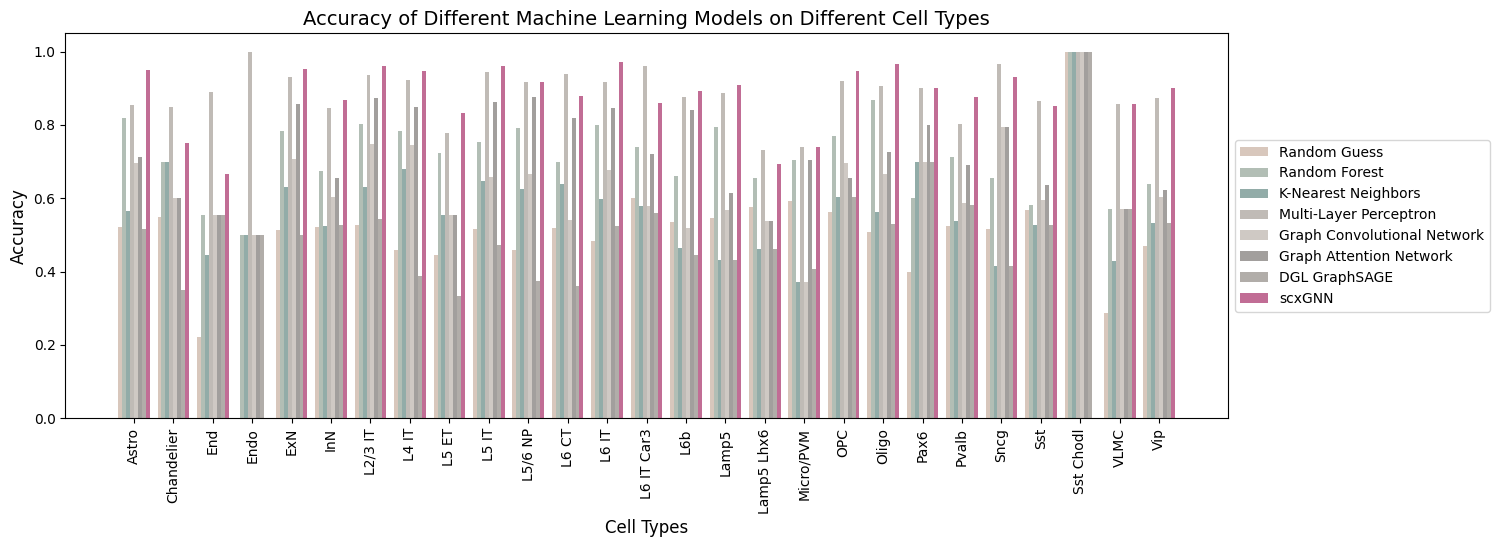

----------------------------------------------------------------
in split 1


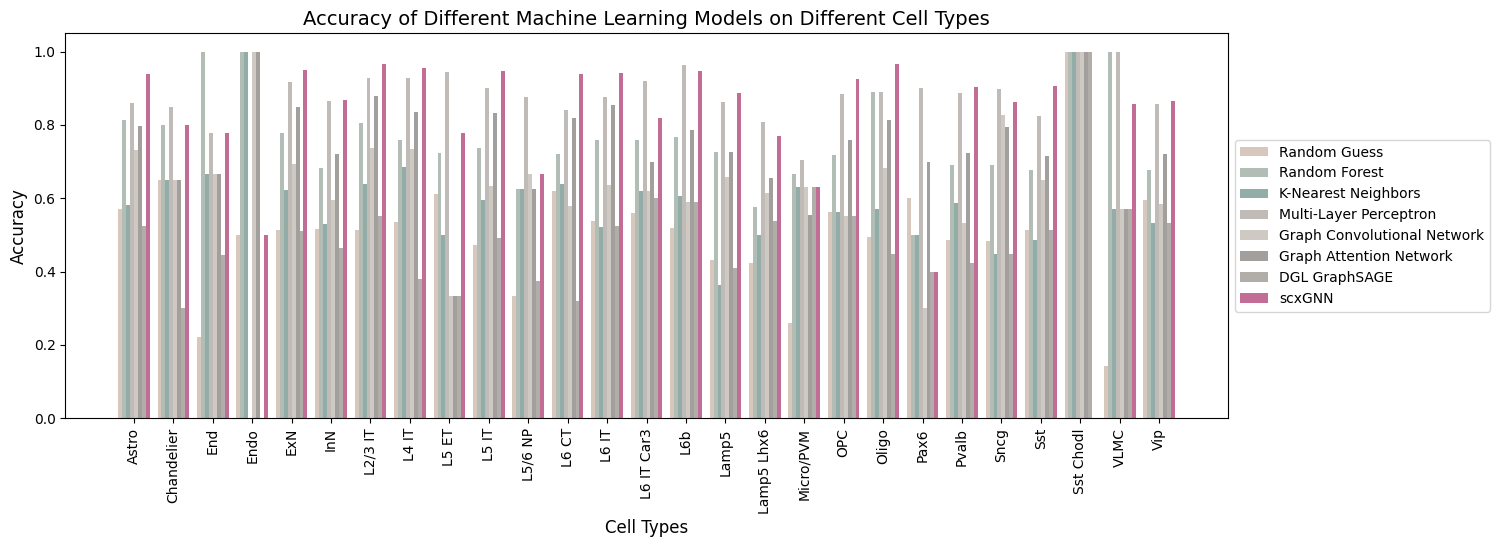

----------------------------------------------------------------
in split 2


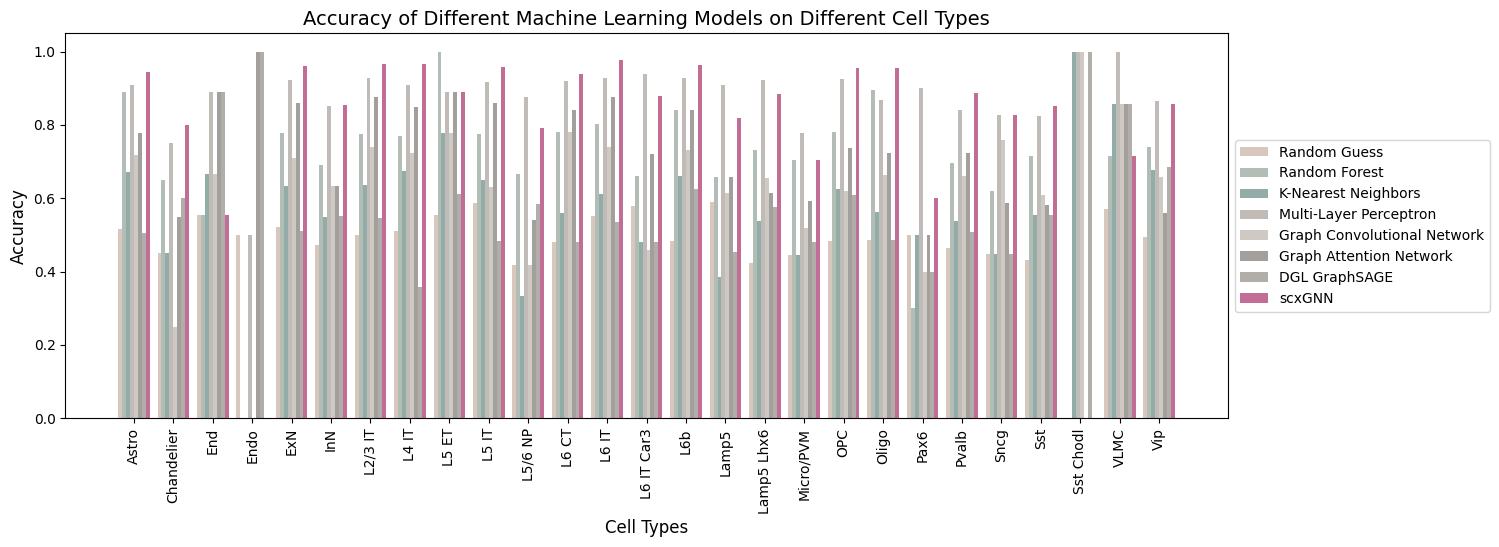

----------------------------------------------------------------
in split 3


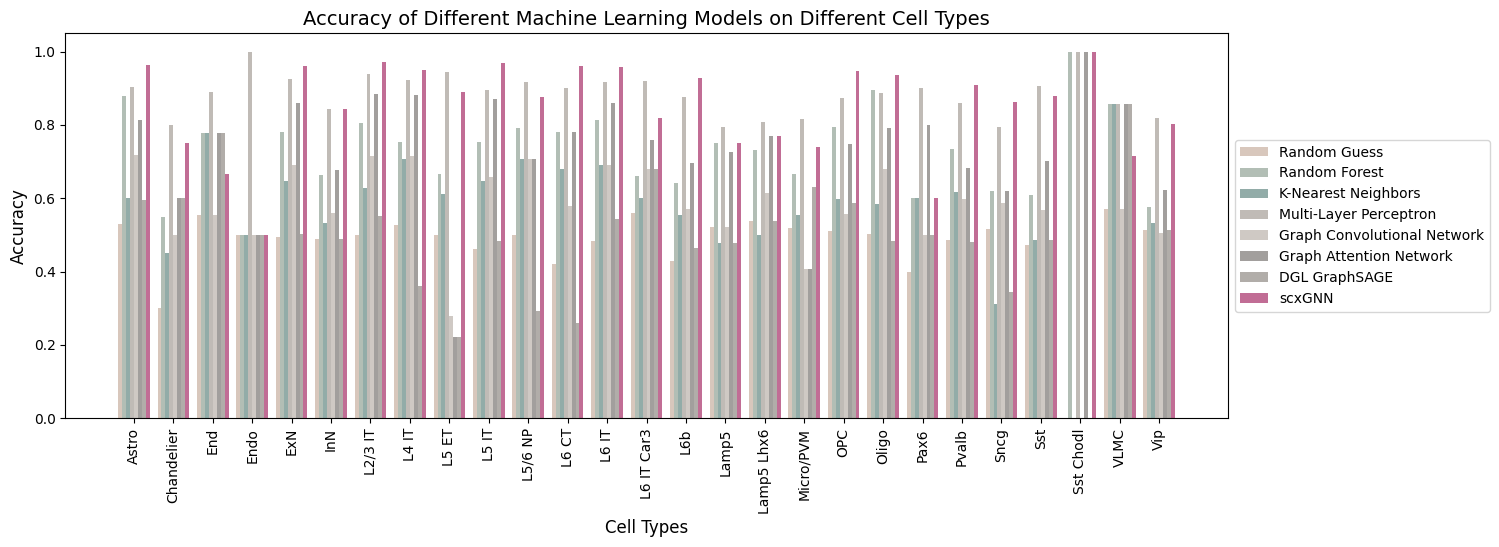

----------------------------------------------------------------
in split 4


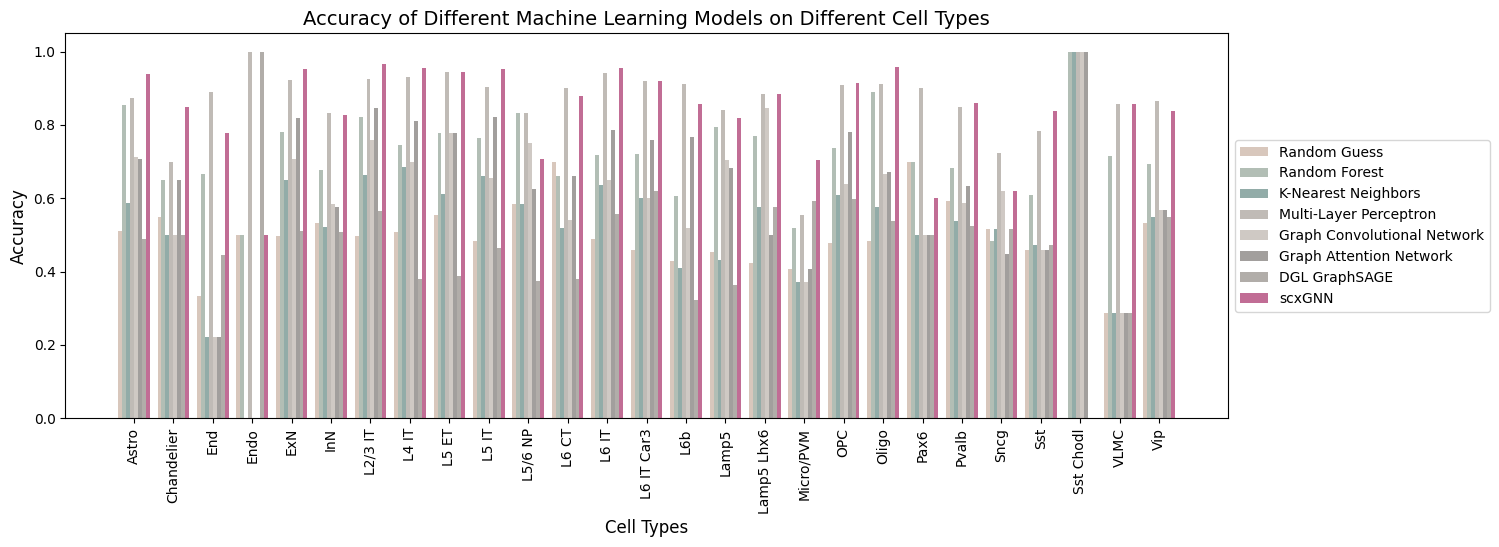

----------------------------------------------------------------
in split 5


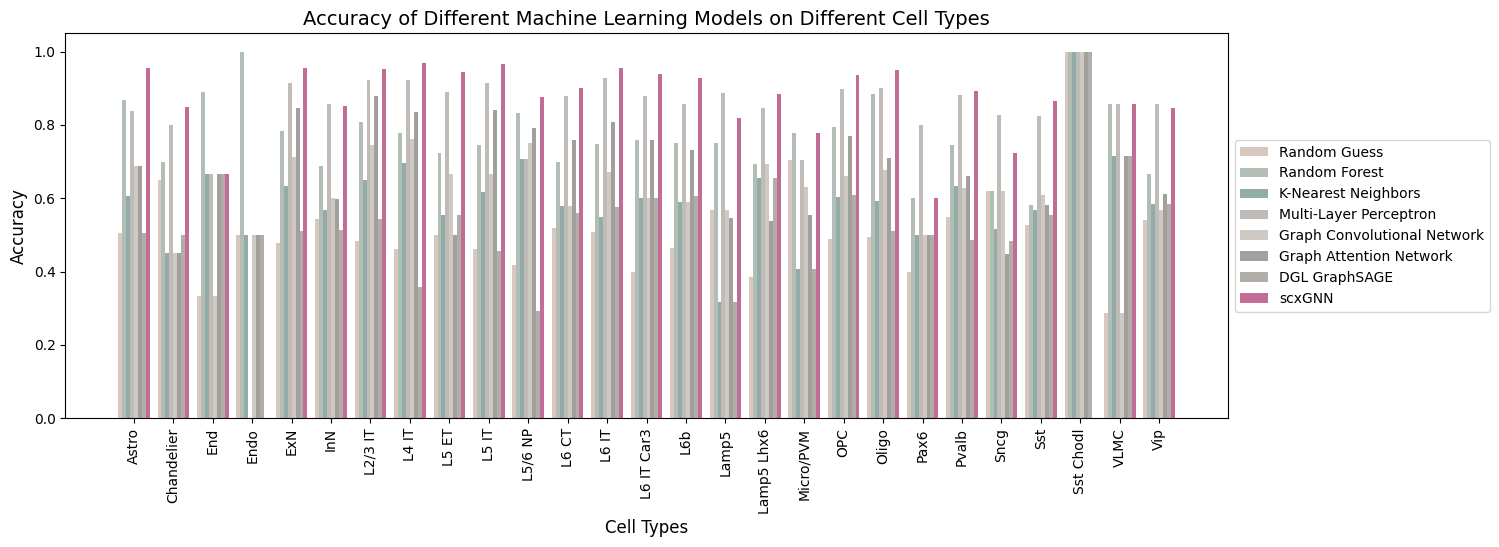

----------------------------------------------------------------
in split 6


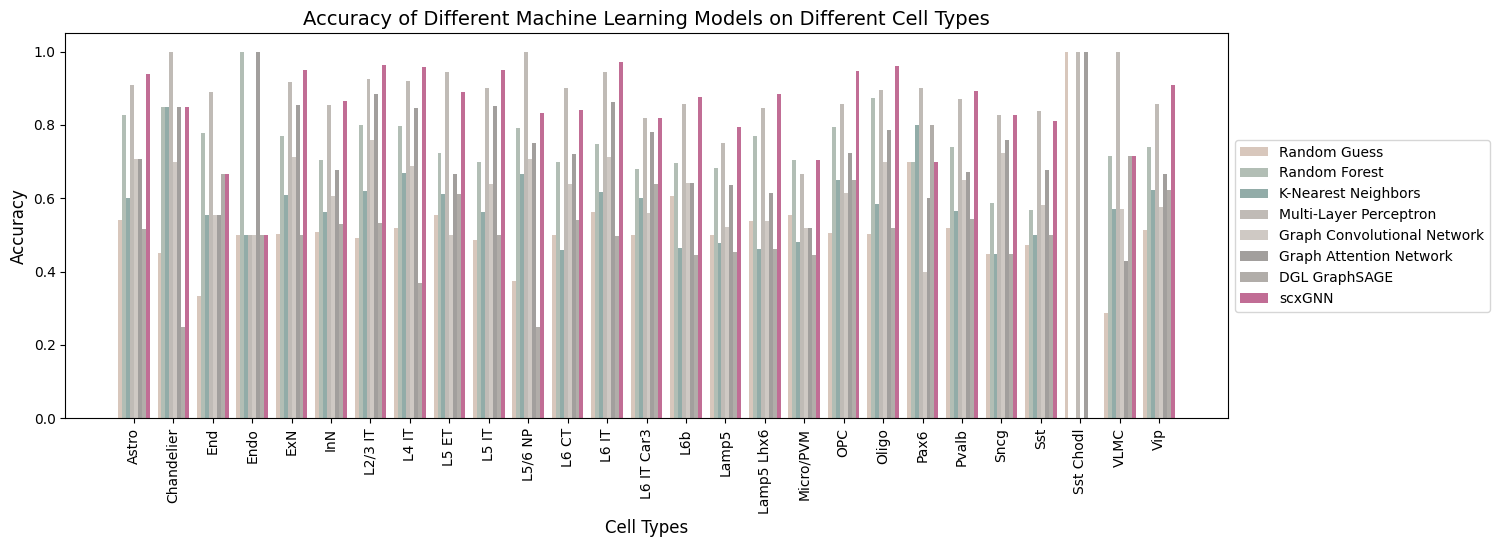

----------------------------------------------------------------
in split 7


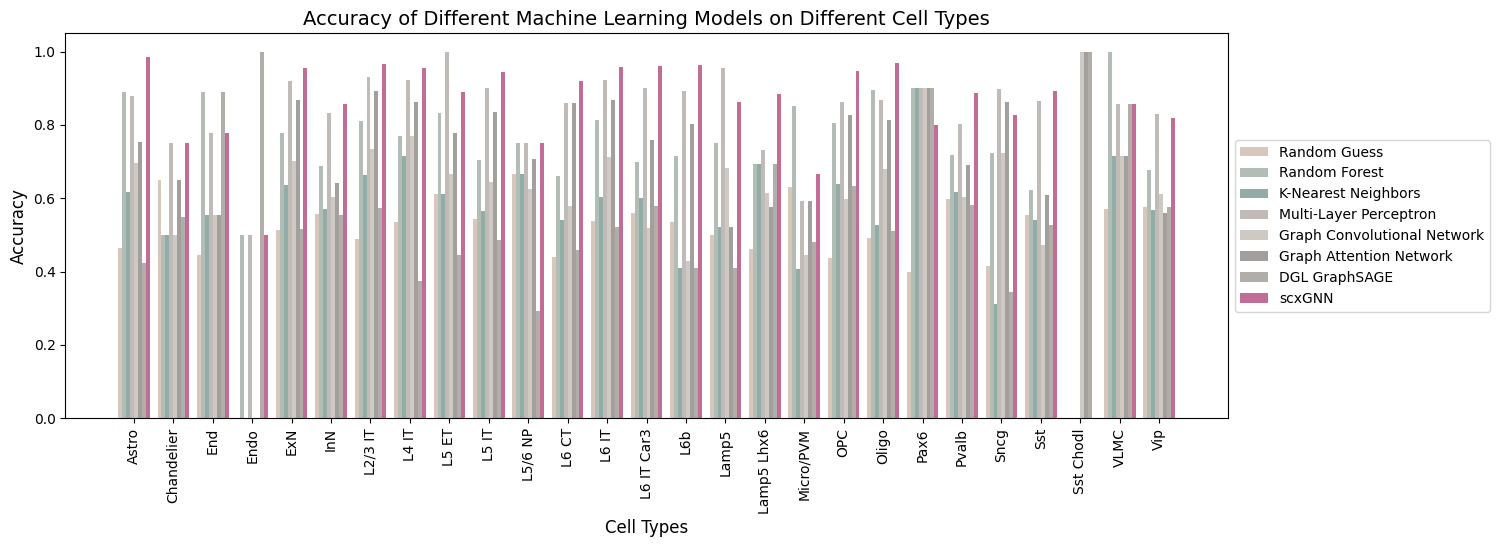

----------------------------------------------------------------
in split 8


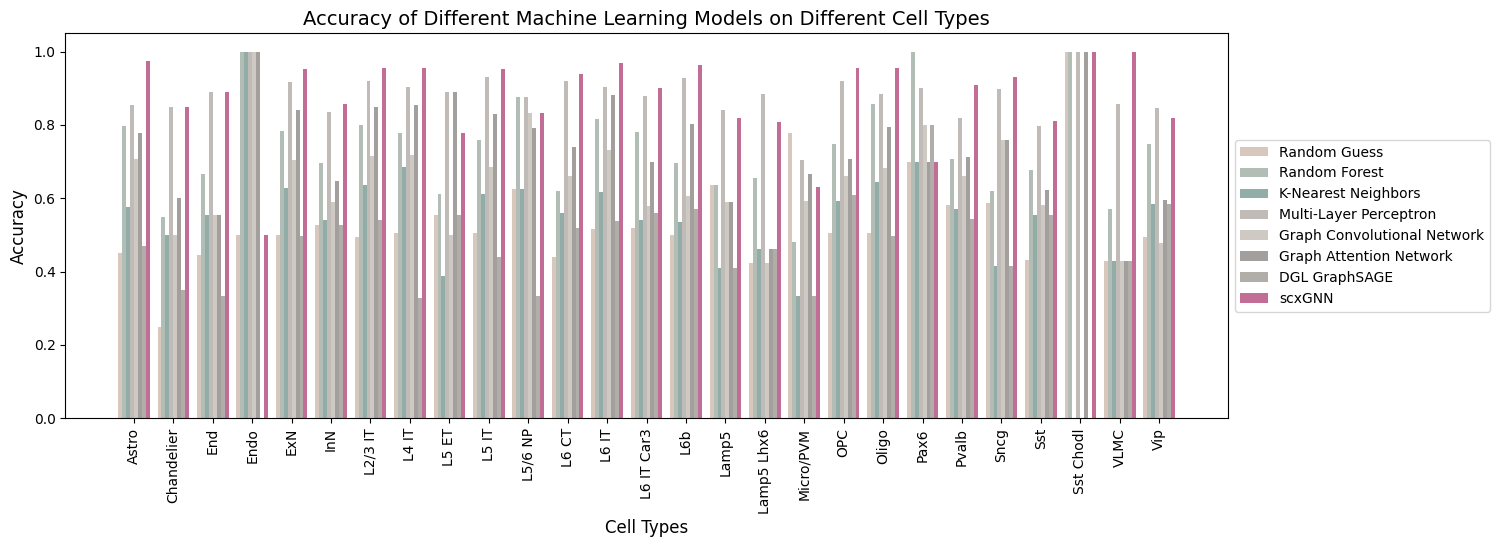

----------------------------------------------------------------
in split 9


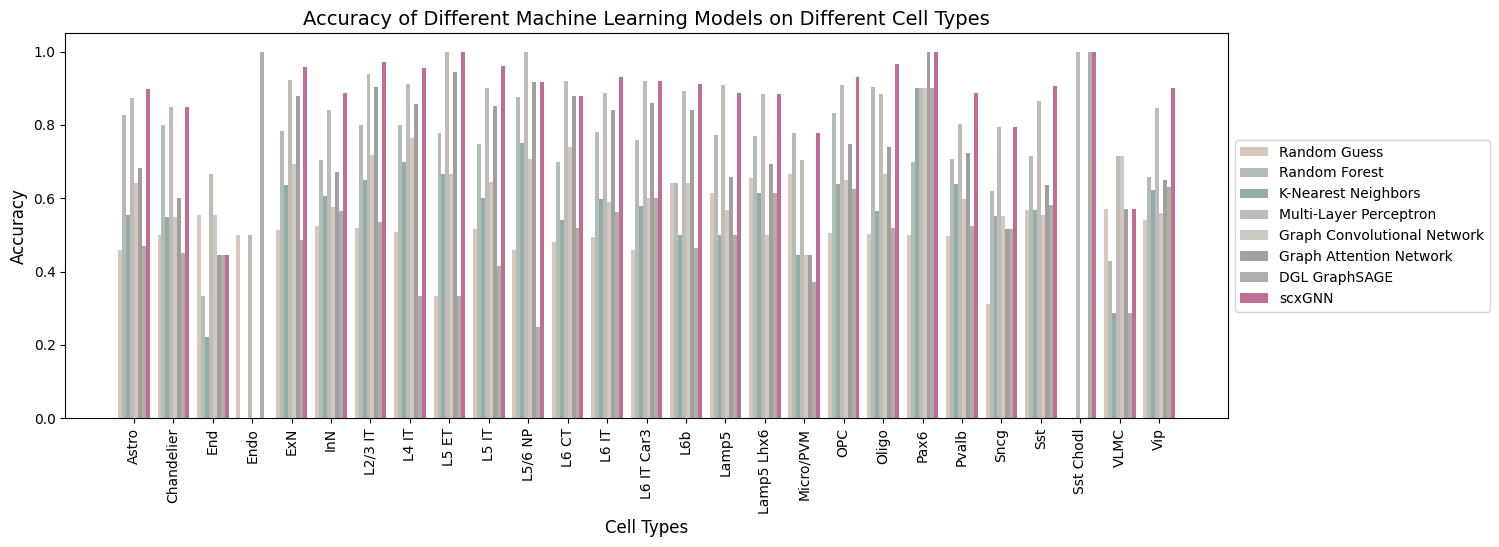

In [12]:
for i in range(10):
    print("----------------------------------------------------------------")
    print("in split "+str(i))
    random_acc_per_cell_type = acc_per_cell_type(random_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    RF_acc_per_cell_type = acc_per_cell_type(RF_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    KNN_acc_per_cell_type = acc_per_cell_type(KNN_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    MLP_acc_per_cell_type = acc_per_cell_type(MLP_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    GCN_acc_per_cell_type = acc_per_cell_type(GCN_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    GAT_acc_per_cell_type = acc_per_cell_type(GAT_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    DGL_GraphSAGE_acc_per_cell_type = acc_per_cell_type(DGL_GraphSAGE_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    scxGNNv1_acc_per_cell_type = acc_per_cell_type(scxGNNv1_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    scxGNN_acc_per_cell_type = acc_per_cell_type(scxGNN_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])

    # Define the y-axis values as a list of accuracy scores for each cell type
    random_acc_scores = []
    RF_acc_scores = []
    KNN_acc_scores = []
    MLP_acc_scores = []
    GCN_acc_scores = []
    GAT_acc_scores = []
    DGL_GraphSAGE_acc_scores = []
    scxGNNv1_acc_scores = []
    scxGNN_acc_scores = []
    
    for cell_type in all_cell_types:
        random_acc_scores.append(random_acc_per_cell_type[cell_type])
        RF_acc_scores.append(RF_acc_per_cell_type[cell_type])
        KNN_acc_scores.append(KNN_acc_per_cell_type[cell_type])
        MLP_acc_scores.append(MLP_acc_per_cell_type[cell_type])
        GCN_acc_scores.append(GCN_acc_per_cell_type[cell_type])
        GAT_acc_scores.append(GAT_acc_per_cell_type[cell_type])
        DGL_GraphSAGE_acc_scores.append(DGL_GraphSAGE_acc_per_cell_type[cell_type])
        scxGNNv1_acc_scores.append(scxGNNv1_acc_per_cell_type[cell_type])
        scxGNN_acc_scores.append(scxGNN_acc_per_cell_type[cell_type])

    # Define the width of the bars
    bar_width = 0.1

    # Define the positions of the bars on the x-axis
    r1 = list(range(len(all_cell_types)))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]
    r5 = [x + bar_width for x in r4]
    r6 = [x + bar_width for x in r5]
    r7 = [x + bar_width for x in r6]
    r8 = [x + bar_width for x in r7]
    r9 = [x + bar_width for x in r8]

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(15, 5))

    # Plot the bars
    ax.bar(r1, random_acc_scores, color=method_colors[0], width=bar_width, label='Random Guess')
    ax.bar(r2, RF_acc_scores, color=method_colors[1], width=bar_width, label='Random Forest')
    ax.bar(r3, KNN_acc_scores, color=method_colors[2], width=bar_width, label='K-Nearest Neighbors')
    ax.bar(r4, MLP_acc_scores, color=method_colors[3], width=bar_width, label='Multi-Layer Perceptron')
    ax.bar(r5, GCN_acc_scores, color=method_colors[4], width=bar_width, label='Graph Convolutional Network')
    ax.bar(r6, GAT_acc_scores, color=method_colors[5], width=bar_width, label='Graph Attention Network')
    ax.bar(r7, DGL_GraphSAGE_acc_scores, color=method_colors[6], width=bar_width, label='DGL GraphSAGE')
#     ax.bar(r8, scxGNNv1_acc_scores, color=method_colors[0], width=bar_width, label='scxGNNv1')
    ax.bar(r8, scxGNN_acc_scores, color=method_colors[7], width=bar_width, label='scxGNN')

    # Add x-axis and y-axis labels
    ax.set_xlabel('Cell Types', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)

    # Add a title for the plot
    ax.set_title('Accuracy of Different Machine Learning Models on Different Cell Types', fontsize=14)

    # Add legend
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90)

    # Set the x-axis tick labels to be the cell type names
    plt.xticks([r + bar_width*3.5 for r in range(len(all_cell_types))], all_cell_types)

#     # Add score labels on top of each bar
#     for i in range(len(cell_types)):
#         ax.text(r1[i]-0.03, RF_acc_scores[i]+0.01, round(RF_acc_scores[i],2), fontsize=8)
#         ax.text(r2[i]-0.03, KNN_acc_scores[i]+0.01, round(KNN_acc_scores[i],2), fontsize=8)
#         ax.text(r3[i]-0.03, MLP_acc_scores[i]+0.01, round(MLP_acc_scores[i],2), fontsize=8)
#         ax.text(r4[i]-0.03, GCN_acc_scores[i]+0.01, round(GCN_acc_scores[i],2), fontsize=8)
#         ax.text(r5[i]-0.03, GAT_acc_scores[i]+0.01, round(GAT_acc_scores[i],2), fontsize=8)
#         ax.text(r6[i]-0.03, DGL_GraphSAGE_acc_scores[i]+0.01, round(DGL_GraphSAGE_acc_scores[i],2), fontsize=8)
#         ax.text(r7[i]-0.03, scxGNNv1_acc_scores[i]+0.01, round(scxGNNv1_acc_scores[i],2), fontsize=8)
#         ax.text(r8[i]-0.03, scxGNN_acc_scores[i]+0.01, round(scxGNN_acc_scores[i],2), fontsize=8)
    
    # Display the plot
    plt.show()

In [ ]:
# Compute the average/std accuracy scores across all data splits
random_acc_per_cell_type_avg_std = {}
RF_acc_per_cell_type_avg_std = {}
KNN_acc_per_cell_type_avg_std = {}
MLP_acc_per_cell_type_avg_std = {}
GCN_acc_per_cell_type_avg_std = {}
GAT_acc_per_cell_type_avg_std = {}
DGL_GraphSAGE_acc_per_cell_type_avg_std = {}
scxGNNv1_acc_per_cell_type_avg_std = {}
scxGNN_acc_per_cell_type_avg_std = {}

avg_std_list = [random_acc_per_cell_type_avg_std, RF_acc_per_cell_type_avg_std,KNN_acc_per_cell_type_avg_std,MLP_acc_per_cell_type_avg_std,GCN_acc_per_cell_type_avg_std,\
               GAT_acc_per_cell_type_avg_std,DGL_GraphSAGE_acc_per_cell_type_avg_std,scxGNNv1_acc_per_cell_type_avg_std,scxGNN_acc_per_cell_type_avg_std]

for l in avg_std_list:
    for c in all_cell_types:
        l[c] = []

for i in range(10):
    random_acc_per_cell_type = acc_per_cell_type(random_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    RF_acc_per_cell_type = acc_per_cell_type(RF_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    KNN_acc_per_cell_type = acc_per_cell_type(KNN_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    MLP_acc_per_cell_type = acc_per_cell_type(MLP_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    GCN_acc_per_cell_type = acc_per_cell_type(GCN_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    GAT_acc_per_cell_type = acc_per_cell_type(GAT_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    DGL_GraphSAGE_acc_per_cell_type = acc_per_cell_type(DGL_GraphSAGE_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    scxGNNv1_acc_per_cell_type = acc_per_cell_type(scxGNNv1_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
    scxGNN_acc_per_cell_type = acc_per_cell_type(scxGNN_total_pred_list[i], total_label_list[i], test_cell_types_total_list[i])
   
    for cell_type in all_cell_types:
        random_acc_per_cell_type_avg_std[cell_type].append(random_acc_per_cell_type[cell_type])
        RF_acc_per_cell_type_avg_std[cell_type].append(RF_acc_per_cell_type[cell_type])
        KNN_acc_per_cell_type_avg_std[cell_type].append(KNN_acc_per_cell_type[cell_type])
        MLP_acc_per_cell_type_avg_std[cell_type].append(MLP_acc_per_cell_type[cell_type])
        GCN_acc_per_cell_type_avg_std[cell_type].append(GCN_acc_per_cell_type[cell_type])
        GAT_acc_per_cell_type_avg_std[cell_type].append(GAT_acc_per_cell_type[cell_type])
        DGL_GraphSAGE_acc_per_cell_type_avg_std[cell_type].append(DGL_GraphSAGE_acc_per_cell_type[cell_type])
        scxGNNv1_acc_per_cell_type_avg_std[cell_type].append(scxGNNv1_acc_per_cell_type[cell_type])
        scxGNN_acc_per_cell_type_avg_std[cell_type].append(scxGNN_acc_per_cell_type[cell_type])

random_acc_scores_avg = []
RF_acc_scores_avg = []
KNN_acc_scores_avg = []
MLP_acc_scores_avg = []
GCN_acc_scores_avg = []
GAT_acc_scores_avg = []
DGL_GraphSAGE_acc_scores_avg = []
scxGNNv1_acc_scores_avg = []
scxGNN_acc_scores_avg = []

random_acc_scores_std = []
RF_acc_scores_std = []
KNN_acc_scores_std = []
MLP_acc_scores_std = []
GCN_acc_scores_std = []
GAT_acc_scores_std = []
DGL_GraphSAGE_acc_scores_std = []
scxGNNv1_acc_scores_std = []
scxGNN_acc_scores_std = []

# Define the y-axis values as a list of accuracy scores for each cell type
for c in all_cell_types:
    random_acc_scores_avg.append(np.mean(random_acc_per_cell_type_avg_std[c]))
    RF_acc_scores_avg.append(np.mean(RF_acc_per_cell_type_avg_std[c]))
    KNN_acc_scores_avg.append(np.mean(KNN_acc_per_cell_type_avg_std[c]))
    MLP_acc_scores_avg.append(np.mean(MLP_acc_per_cell_type_avg_std[c]))
    GCN_acc_scores_avg.append(np.mean(GCN_acc_per_cell_type_avg_std[c]))
    GAT_acc_scores_avg.append(np.mean(GAT_acc_per_cell_type_avg_std[c]))
    DGL_GraphSAGE_acc_scores_avg.append(np.mean(DGL_GraphSAGE_acc_per_cell_type_avg_std[c]))
    scxGNNv1_acc_scores_avg.append(np.mean(scxGNNv1_acc_per_cell_type_avg_std[c]))
    scxGNN_acc_scores_avg.append(np.mean(scxGNN_acc_per_cell_type_avg_std[c]))
    
    random_acc_scores_std.append(np.std(random_acc_per_cell_type_avg_std[c]))
    RF_acc_scores_std.append(np.std(RF_acc_per_cell_type_avg_std[c]))
    KNN_acc_scores_std.append(np.std(KNN_acc_per_cell_type_avg_std[c]))
    MLP_acc_scores_std.append(np.std(MLP_acc_per_cell_type_avg_std[c]))
    GCN_acc_scores_std.append(np.std(GCN_acc_per_cell_type_avg_std[c]))
    GAT_acc_scores_std.append(np.std(GAT_acc_per_cell_type_avg_std[c]))
    DGL_GraphSAGE_acc_scores_std.append(np.std(DGL_GraphSAGE_acc_per_cell_type_avg_std[c]))
    scxGNNv1_acc_scores_std.append(np.std(scxGNNv1_acc_per_cell_type_avg_std[c]))
    scxGNN_acc_scores_std.append(np.std(scxGNN_acc_per_cell_type_avg_std[c]))

# Define the width of the bars
bar_width = 0.1

# Define the positions of the bars on the x-axis
r1 = list(range(len(all_cell_types)))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(r1, random_acc_scores_avg, color=method_colors[0], width=bar_width, label='Random Guess')
ax.bar(r2, RF_acc_scores_avg, color=method_colors[1], width=bar_width, label='Random Forest')
ax.bar(r3, KNN_acc_scores_avg, color=method_colors[2], width=bar_width, label='K-Nearest Neighbors')
ax.bar(r4, MLP_acc_scores_avg, color=method_colors[3], width=bar_width, label='Multi-Layer Perceptron')
ax.bar(r5, GCN_acc_scores_avg, color=method_colors[4], width=bar_width, label='Graph Convolutional Network')
ax.bar(r6, GAT_acc_scores_avg, color=method_colors[5], width=bar_width, label='Graph Attention Network')
ax.bar(r7, DGL_GraphSAGE_acc_scores_avg, color=method_colors[6], width=bar_width, label='DGL GraphSAGE')
# ax.bar(r7, scxGNNv1_acc_scores_avg, color=colors[6], width=bar_width, label='ExAD-GNNv1')
ax.bar(r8, scxGNN_acc_scores_avg, color=method_colors[7], width=bar_width, label='ExAD-GNN')

# Add x-axis and y-axis labels
ax.set_xlabel('Cell Types', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Add a title for the plot
ax.set_title('Average Accuracy of Different Machine Learning Models on Different Cell Types', fontsize=14)

# Move legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Set the x-axis tick labels to be the cell type names
plt.xticks([r + bar_width*3.5 for r in range(len(all_cell_types))], all_cell_types)
 
# Display the plot
plt.show()

In [63]:
# print("Average Random Guess:", accuracy_score(total_label_list_sum, random_total_pred_list_sum))
# print("Average Random Forests:", accuracy_score(total_label_list_sum, RF_total_pred_list_sum))
# print("Average K Nearest Neighbors:", accuracy_score(total_label_list_sum, KNN_total_pred_list_sum))
# print("Average Multi-Layer Perceptron:", accuracy_score(total_label_list_sum, MLP_total_pred_list_sum))
# print("Average GCN:", accuracy_score(total_label_list_sum, GCN_total_pred_list_sum))
# print("Average GAT:", accuracy_score(total_label_list_sum, GAT_total_pred_list_sum))
# print("Average DGL GraphSAGE:", accuracy_score(dgl_total_label_list_sum, DGL_GraphSAGE_total_pred_list_sum))
# print("Average DGL scxGNNv1:", accuracy_score(total_label_list_sum, scxGNNv1_total_pred_list_sum))
# print("Average DGL scxGNN:", accuracy_score(total_label_list_sum, scxGNN_total_pred_list_sum))

In [13]:
# Compute the mean and standard deviation of each list
random_mean, random_std = np.mean(random_list), np.std(random_list)
RF_mean, RF_std = np.mean(RF_list), np.std(RF_list)
KNN_mean, KNN_std = np.mean(KNN_list), np.std(KNN_list)
MLP_mean, MLP_std = np.mean(MLP_list), np.std(MLP_list)
GCN_mean, GCN_std = np.mean(GCN_list), np.std(GCN_list)
GAT_mean, GAT_std = np.mean(GAT_list), np.std(GAT_list)
GraphSAGE_mean, GraphSAGE_std = np.mean(GraphSAGE_list), np.std(GraphSAGE_list)
scxGNNv1_mean, scxGNNv1_std = np.mean(scxGNNv1_list), np.std(scxGNNv1_list)
scxGNN_mean, scxGNN_std = np.mean(scxGNN_list), np.std(scxGNN_list)

# Print the mean and standard deviation of each list
print(f"Random Guess: \t\t\tmean={random_mean:.3f}, \tstd={random_std:.3f}")
print(f"Random Forests: \t\tmean={RF_mean:.3f}, \tstd={RF_std:.3f}")
print(f"K Nearest Neighbors: \t\tmean={KNN_mean:.3f}, \tstd={KNN_std:.3f}")
print(f"Multi-Layer Perceptron: \tmean={MLP_mean:.3f}, \tstd={MLP_std:.3f}")
print(f"GCN: \t\t\t\tmean={GCN_mean:.3f}, \tstd={GCN_std:.3f}")
print(f"GAT: \t\t\t\tmean={GAT_mean:.3f}, \tstd={GAT_std:.3f}")
print(f"GraphSAGE: \t\t\tmean={GraphSAGE_mean:.3f}, \tstd={GraphSAGE_std:.3f}")
print(f"scxGNNv1: \t\t\tmean={scxGNNv1_mean:.3f}, \tstd={scxGNNv1_std:.3f}")
print(f"scxGNN: \t\t\tmean={scxGNN_mean:.3f}, \tstd={scxGNN_std:.3f}")

Random Guess: 			mean=0.506, 	std=0.007
Random Forests: 		mean=0.786, 	std=0.005
K Nearest Neighbors: 		mean=0.608, 	std=0.007
Multi-Layer Perceptron: 	mean=0.900, 	std=0.005
GCN: 				mean=0.678, 	std=0.008
GAT: 				mean=0.795, 	std=0.019
GraphSAGE: 			mean=0.923, 	std=0.006
scxGNNv1: 			mean=0.935, 	std=0.004
scxGNN: 			mean=0.938, 	std=0.003


In [78]:
# Create a list of dictionaries containing the table data
table_data = [
    {'Method': 'Random Guess', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(random_acc_scores_avg, random_acc_scores_std)]))},
    {'Method': 'Random Forest', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(RF_acc_scores_avg, RF_acc_scores_std)]))},
    {'Method': 'K-Nearest Neighbors', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(KNN_acc_scores_avg, KNN_acc_scores_std)]))},
    {'Method': 'Multi-Layer Perceptron', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(MLP_acc_scores_avg, MLP_acc_scores_std)]))},
    {'Method': 'Graph Convolutional Network', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" if a is not None else 'NA' for a, b in zip(GCN_acc_scores_avg, GCN_acc_scores_std)]))},
    {'Method': 'Graph Attention Network', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(GAT_acc_scores_avg, GAT_acc_scores_std)]))},
    {'Method': 'DGL GraphSAGE', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(DGL_GraphSAGE_acc_scores_avg, DGL_GraphSAGE_acc_scores_std)]))},
#     {'Method': 'ExAD-GNNv1', **dict(zip(cell_types, [f"{a:.2f} +/- {b:.2f}" for a, b in zip(scxGNNv1_acc_scores_avg, scxGNNv1_acc_scores_std)]))},
    {'Method': 'ExAD-GNN', **dict(zip(all_cell_types, [f"{a:.2f}/{b:.2f}" for a, b in zip(scxGNN_acc_scores_avg, scxGNN_acc_scores_std)]))}
]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(table_data)

# Reorder the columns to have "Method" first
cols = list(df.columns)
cols = [cols.pop(cols.index('Method'))] + cols
df = df[cols]

# Display the table
print(df)


                        Method      Astro Chandelier        End       Endo  \
0                 Random Guess  0.51/0.04  0.50/0.13  0.40/0.12  0.40/0.20   
1                Random Forest  0.85/0.03  0.68/0.11  0.71/0.19  0.60/0.37   
2          K-Nearest Neighbors  0.60/0.03  0.56/0.13  0.53/0.18  0.40/0.37   
3       Multi-Layer Perceptron  0.88/0.02  0.82/0.08  0.82/0.09  0.60/0.37   
4  Graph Convolutional Network  0.70/0.02  0.52/0.12  0.52/0.13  0.40/0.37   
5      Graph Attention Network  0.74/0.05  0.62/0.10  0.59/0.17  0.55/0.42   
6                DGL GraphSAGE  0.50/0.04  0.45/0.12  0.61/0.19  0.60/0.37   
7                     ExAD-GNN  0.95/0.02  0.81/0.04  0.69/0.12  0.30/0.24   

         ExN        InN    L2/3 IT      L4 IT      L5 ET  ...  Micro/PVM  \
0  0.50/0.01  0.52/0.02  0.50/0.01  0.51/0.03  0.52/0.08  ...  0.56/0.15   
1  0.78/0.00  0.69/0.01  0.80/0.01  0.77/0.02  0.76/0.10  ...  0.69/0.11   
2  0.63/0.01  0.55/0.03  0.64/0.01  0.69/0.01  0.59/0.10  ...  0.44/0

In [79]:
df.to_csv("/home/zihend1/DiseasePrediction/Data/Figure/Table/mask_cell_type.csv")

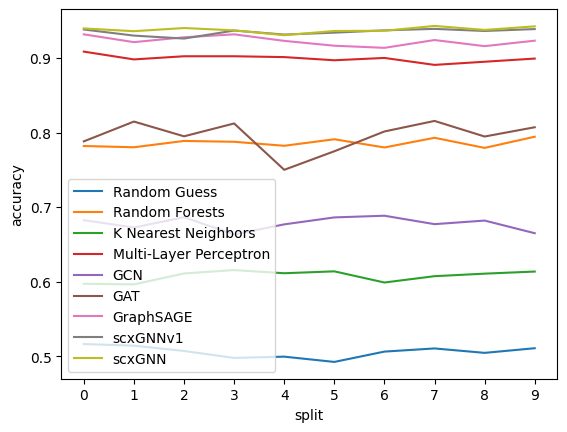

In [80]:
plt.plot(random_list, label="Random Guess")
plt.plot(RF_list, label="Random Forests")
plt.plot(KNN_list, label="K Nearest Neighbors")
plt.plot(MLP_list, label="Multi-Layer Perceptron")
plt.plot(GCN_list, label="GCN")
plt.plot(GAT_list, label="GAT")
plt.plot(GraphSAGE_list, label="GraphSAGE")
plt.plot(scxGNNv1_list, label="scxGNNv1")
plt.plot(scxGNN_list, label="scxGNN")
plt.legend()
plt.xticks(range(10))
plt.xlabel("split")
plt.ylabel("accuracy")
plt.show()